# Statictical Modeling and Advanced Regression Analyses

R Tutorials

Holger Sennhenn-Reulen [](https://orcid.org/0000-0002-4782-4387) (Northwest German Forest Research Institute (NW-FVA))  
December 4, 2024

# Software

We use the statistical software environment *R* \[@RCoreTeam2024\], and R add-on packages *ggplot2* \[@Wickham2016\].

This document is produced using *Quarto* \[@AllaireEtAl2024\]. <!-- Graphics in the PDF version are rendered using R add-on package *tikzDevice* [@SharpsteenBracken2023].  -->

## Organize R Session

In [ ]:
rm(list = ls())
library("ggplot2")

# Linear Regression Model

## Data Simulation

Data are simulated according to the equations given in the lecture slides[1]:

[1] For two covariates `x_1` and `x_2`.

In [ ]:
set.seed(123)
N <- 500
df <- data.frame(x_1 = runif(n = N), 
                 x_2 = runif(n = N))
(beta_0 <- rnorm(n = 1, mean = 1, sd = .1))

[1] 0.9398107

[1] 0.9006301

[1] -0.3973215

[1] 0.293026

### Visualisations

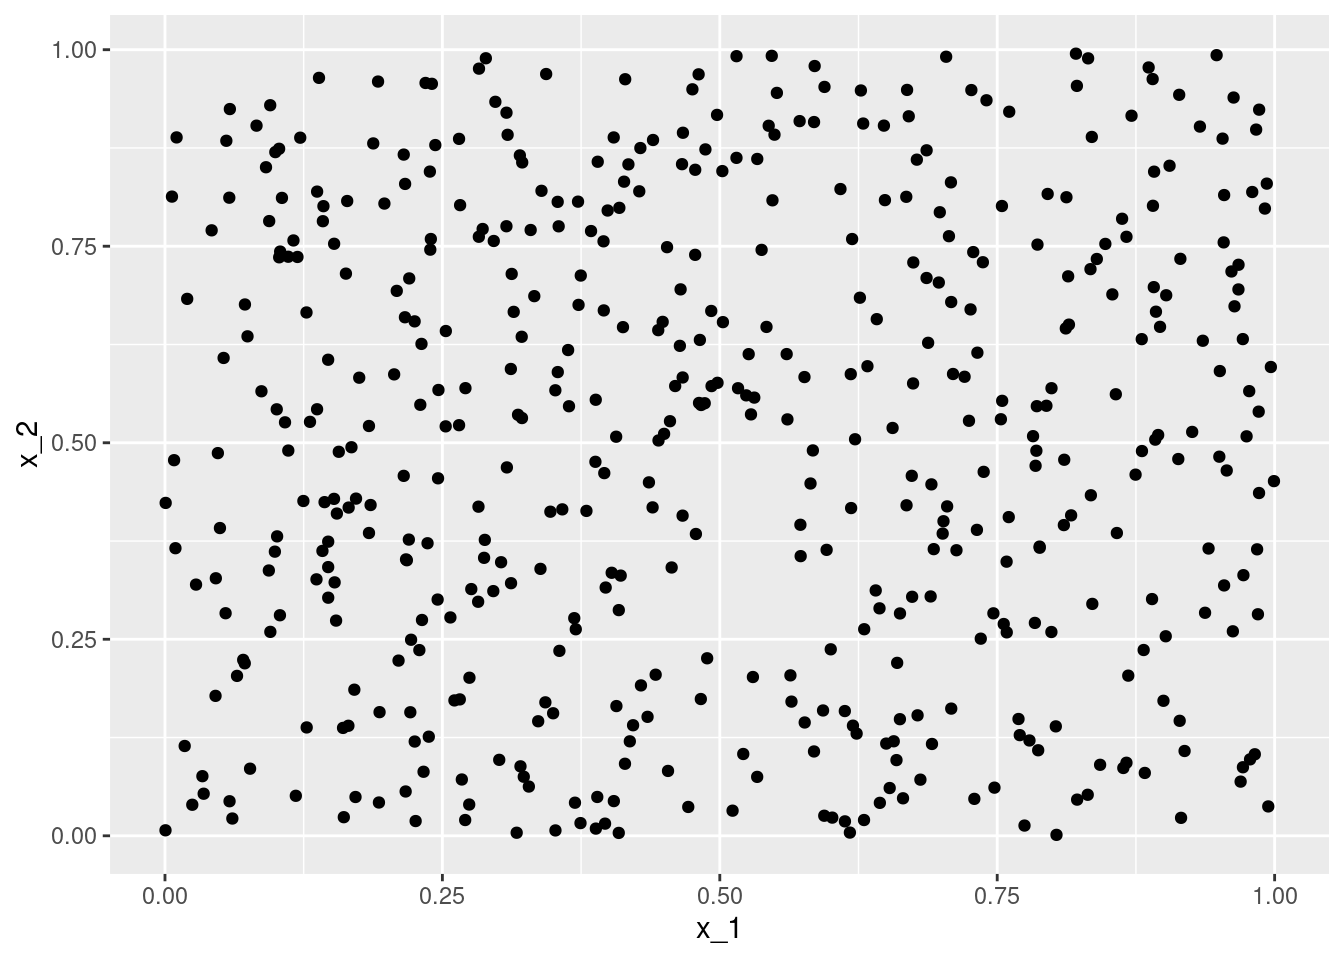

In [ ]:
ggplot(data = df, aes(x = x_1, y = x_2)) + 
  geom_point()

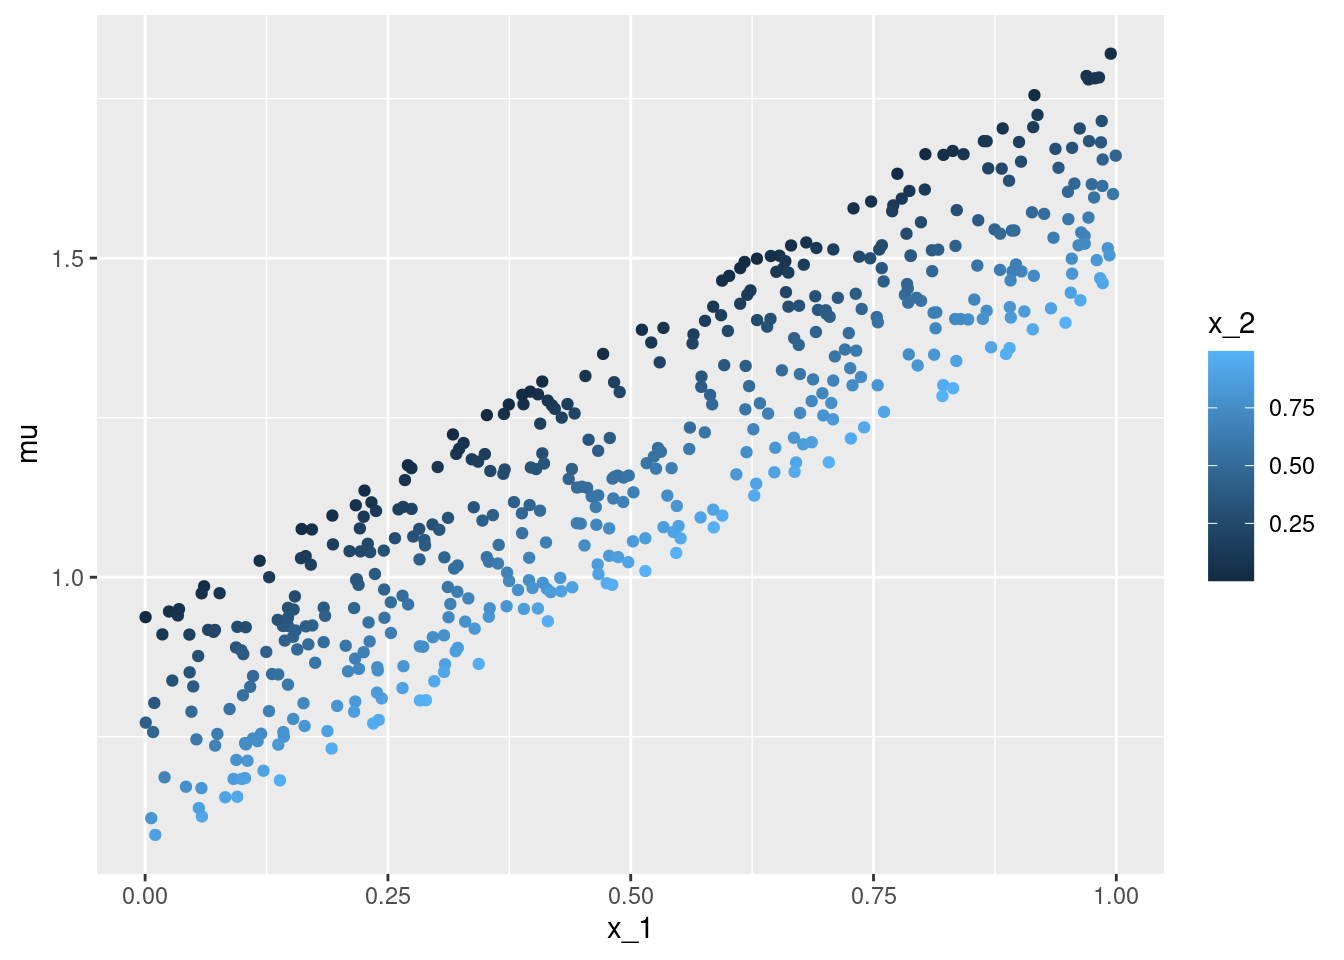

In [ ]:
ggplot(data = df, aes(x = x_1, y = mu, color = x_2)) + 
  geom_point()

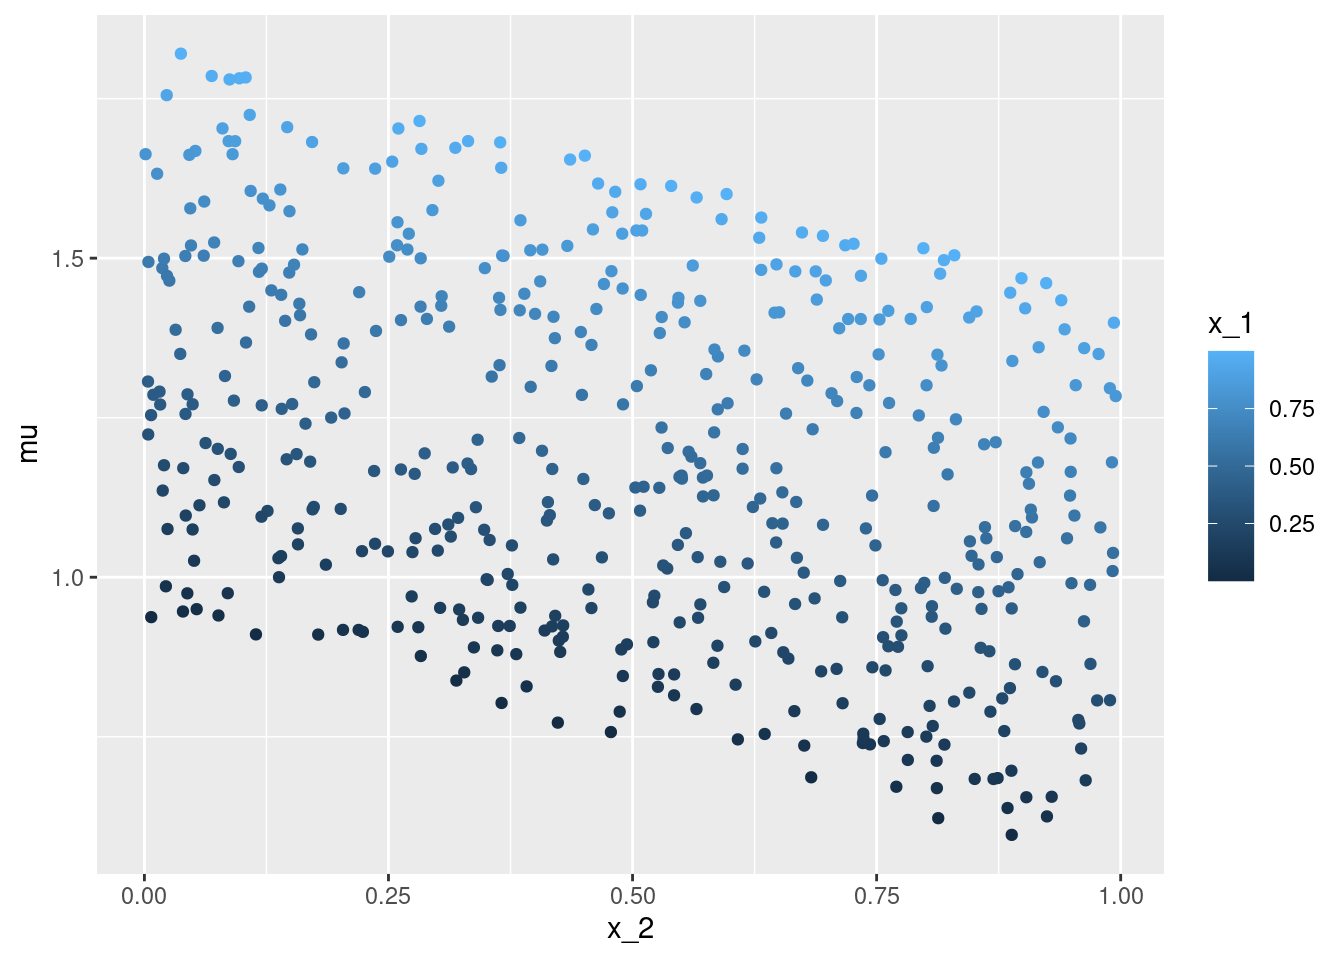

In [ ]:
ggplot(data = df, aes(x = x_2, y = mu, color = x_1)) + 
  geom_point()

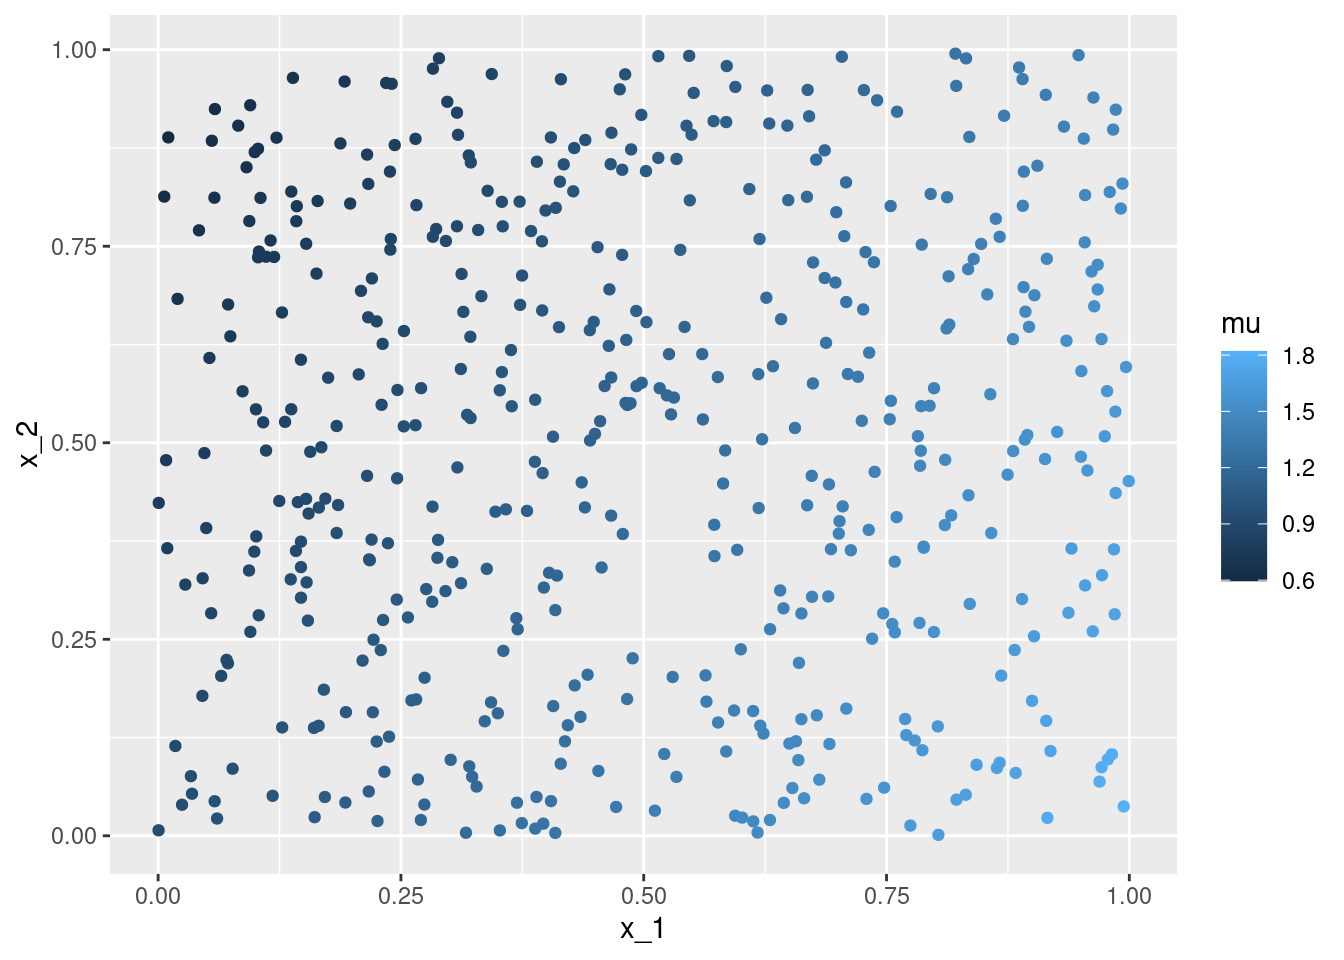

In [ ]:
ggplot(data = df, aes(x = x_1, y = x_2, color = mu)) + 
  geom_point()

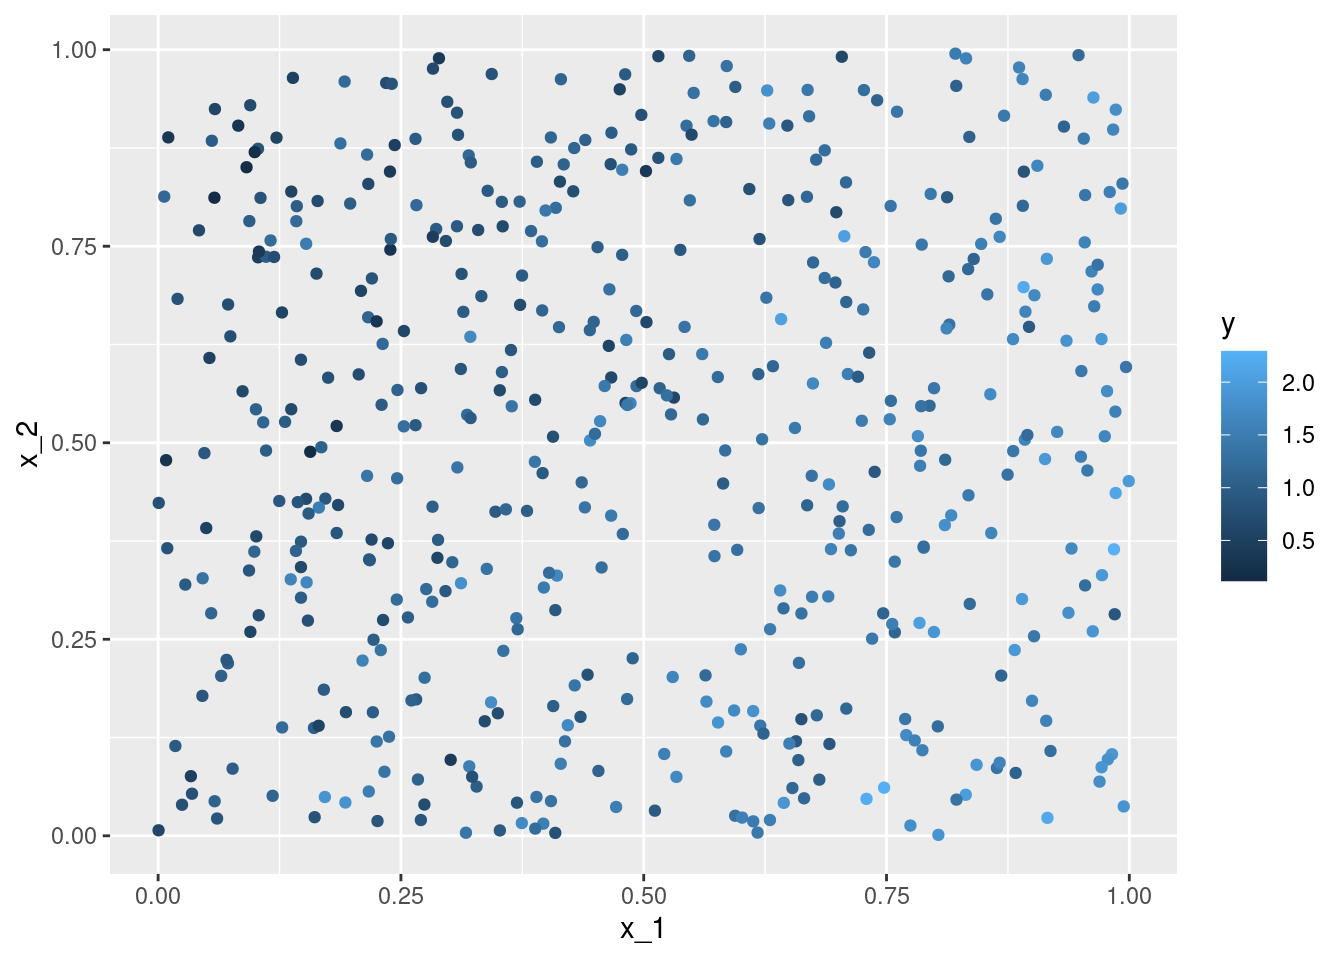

In [ ]:
ggplot(data = df, aes(x = x_1, y = x_2, color = y)) + 
  geom_point()

## Modeling

The basic R command for (frequentist) estimation of the parameters of a linear regression model is a call to the function `lm`:

In [ ]:
m <- lm(y ~ x_1 + x_2, data = df)
summary(m)


Call:
lm(formula = y ~ x_1 + x_2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82082 -0.19805  0.00329  0.19051  0.81138 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.91291    0.03448  26.476  < 2e-16 ***
x_1          0.91533    0.04668  19.610  < 2e-16 ***
x_2         -0.36218    0.04566  -7.933 1.43e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2963 on 497 degrees of freedom
Multiple R-squared:  0.4674,    Adjusted R-squared:  0.4652 
F-statistic:   218 on 2 and 497 DF,  p-value: < 2.2e-16

### Visualisations

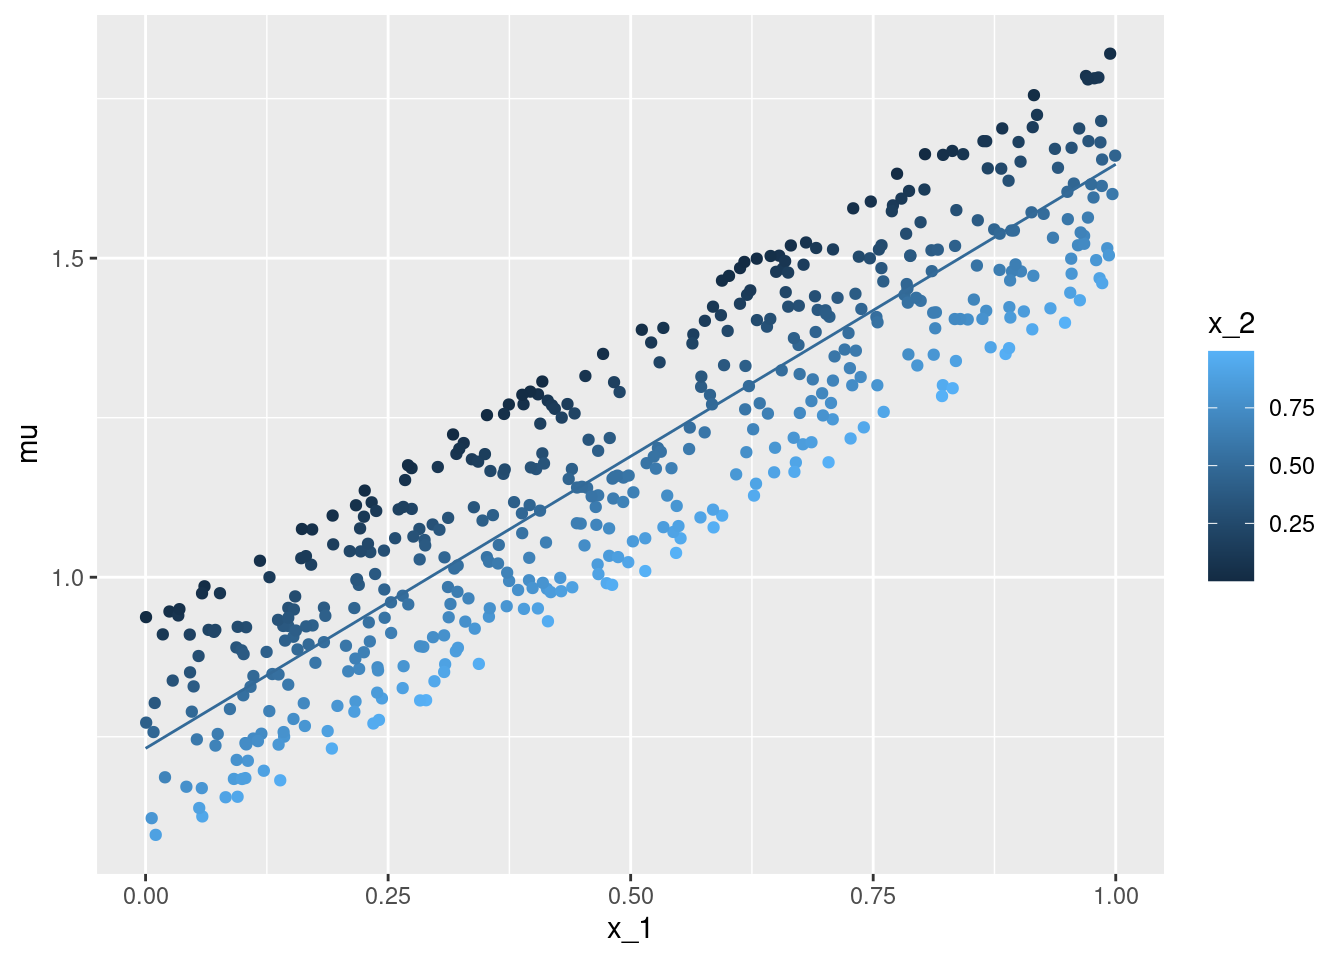

In [ ]:
nd <- data.frame(x_1 = seq(0, 1, by = .1), 
                 x_2 = .5)
nd$mu <- predict(m, newdata = nd)
ggplot(data = df, aes(x = x_1, y = mu, color = x_2)) + 
  geom_point() + 
  geom_line(data = nd, aes(x = x_1, y = mu, color = x_2))

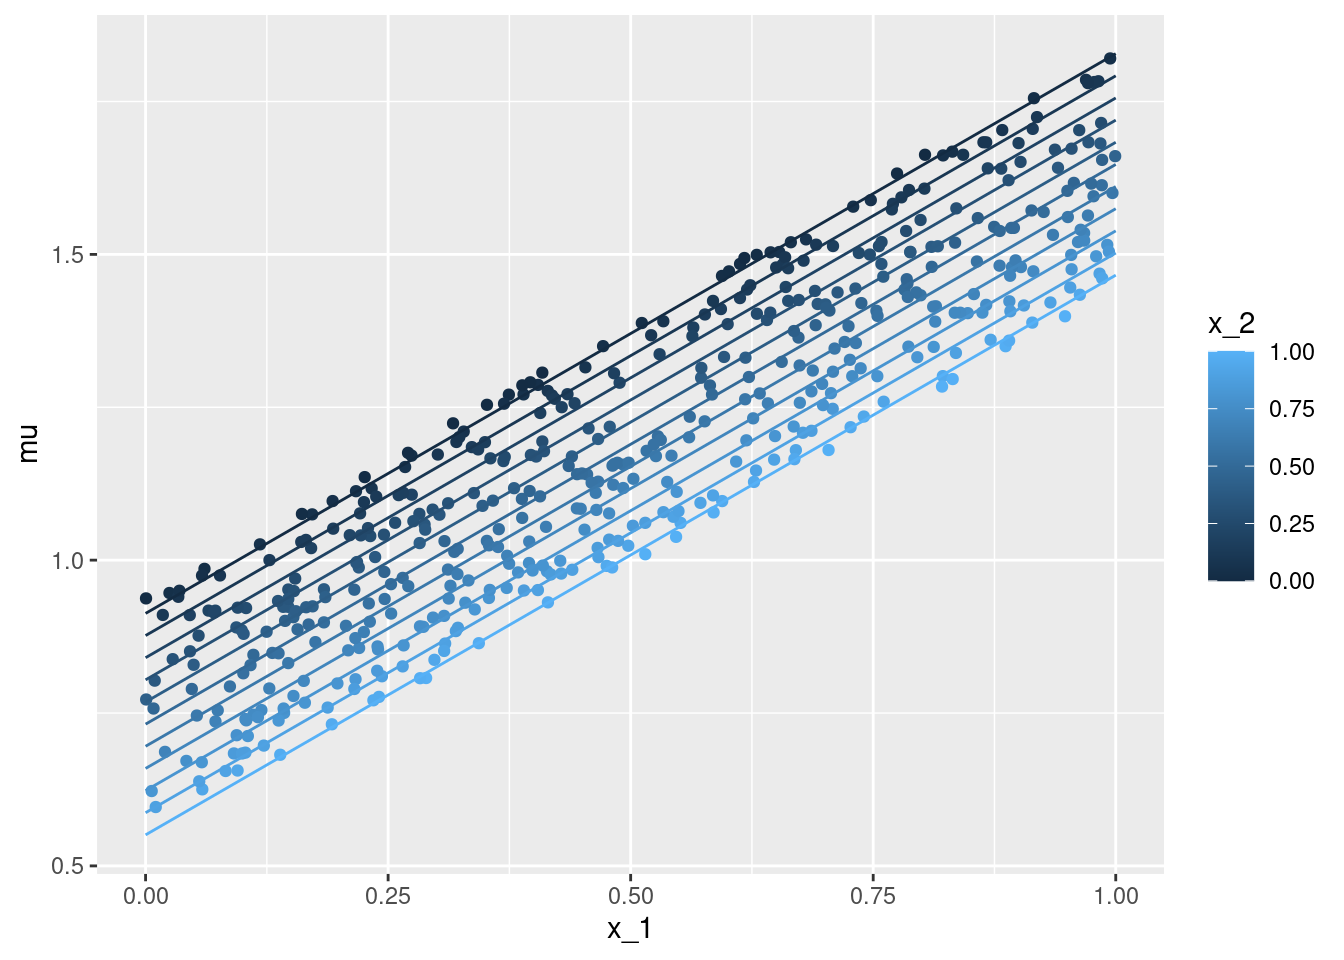

In [ ]:
nd <- data.frame(expand.grid('x_1' = seq(0, 1, by = .1), 
                             'x_2' = seq(0, 1, by = .1)))
nd$mu <- predict(m, newdata = nd)
ggplot(data = df, aes(x = x_1, y = mu, color = x_2)) + 
  geom_point() + 
  geom_line(data = nd, aes(x = x_1, y = mu, color = x_2, group = x_2))

## Add-Ons

### Add-On Linear Model: A) Stancode

#### Stan Users Guide

*Probabilistic Programming Languages* such as *Stan* \[@CarpenterEtAl2017\] allow to `plug together` the single parts of a statistical regression model[1]:

The following Stan-code is published [here](https://mc-stan.org/docs/stan-users-guide/regression.html) in the [Stan users guide](https://mc-stan.org/docs/stan-users-guide/index.html):

[1] Which is actually pretty ‘readable’ if you get used to the structure for a simple model such the linear regression model.

In [ ]:
cat(readLines("lm.stan"), sep = "\n")

data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  y ~ normal(alpha + beta * x, sigma);
}

#### Stancode generated by calling `brms::brm`

The R add-on package *brms* \[@Buerkner2017;@Buerkner2018\] allows to implent advanced regression models without being an expert in ‘Stan-programming’.

Here is the Stan-code that is implemented by ‘brms’ for our linear regression model example:

In [ ]:
brms::make_stancode(brms::bf(y ~ x_1 + x_2, center = F), data = df)

In [ ]:
cat(readLines("lm_brms.stan"), sep = "\n")

// generated with brms 2.21.0
functions {
}
data {
  int<lower=1> N;  // total number of observations
  vector[N] Y;  // response variable
  int<lower=1> K;  // number of population-level effects
  matrix[N, K] X;  // population-level design matrix
  int prior_only;  // should the likelihood be ignored?
}
transformed data {
}
parameters {
  vector[K] b;  // regression coefficients
  real<lower=0> sigma;  // dispersion parameter
}
transformed parameters {
  real lprior = 0;  // prior contributions to the log posterior
  lprior += student_t_lpdf(sigma | 3, 0, 2.5)
    - 1 * student_t_lccdf(0 | 3, 0, 2.5);
}
model {
  // likelihood including constants
  if (!prior_only) {
    target += normal_id_glm_lpdf(Y | X, 0, b, sigma);
  }
  // priors including constants
  target += lprior;
}
generated quantities {
}

### Add-On Linear Model: B) Posterior predictive check: an introduction ‘by hand’

Having an `lm` object already, it is rather straightforward to get posterior samples by using function `sim` from the *arm* \[@GelmanSu2024\] package:

In [ ]:
library("arm")

Lade nötiges Paket: MASS

Lade nötiges Paket: Matrix

Lade nötiges Paket: lme4


arm (Version 1.14-4, built: 2024-4-1)

Working directory is /home/hsennhenn/Dropbox/teaching/Statistical_Modeling_and_Advanced_Regression_Analyses

Formal class 'sim' [package "arm"] with 2 slots
  ..@ coef : num [1:100, 1:3] 0.882 1.014 0.904 0.978 0.958 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:3] "(Intercept)" "x_1" "x_2"
  ..@ sigma: num [1:100] 0.323 0.303 0.292 0.309 0.29 ...

     (Intercept)       x_1        x_2     sigma
[1,]   0.8816414 0.9245094 -0.3362733 0.3227662
[2,]   1.0139849 0.7317948 -0.3398411 0.3033703
[3,]   0.9037042 0.9155575 -0.3506924 0.2922883
[4,]   0.9776909 0.8392790 -0.3845609 0.3090220
[5,]   0.9579213 0.8977625 -0.4284596 0.2900632
[6,]   0.9549211 0.8478278 -0.3937226 0.3094227

Predict the response for the covariate data as provided by the original data-frame `df` - here only by using the first posterior sample:

(Intercept)         x_1         x_2       sigma 
  0.8816414   0.9245094  -0.3362733   0.3227662 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

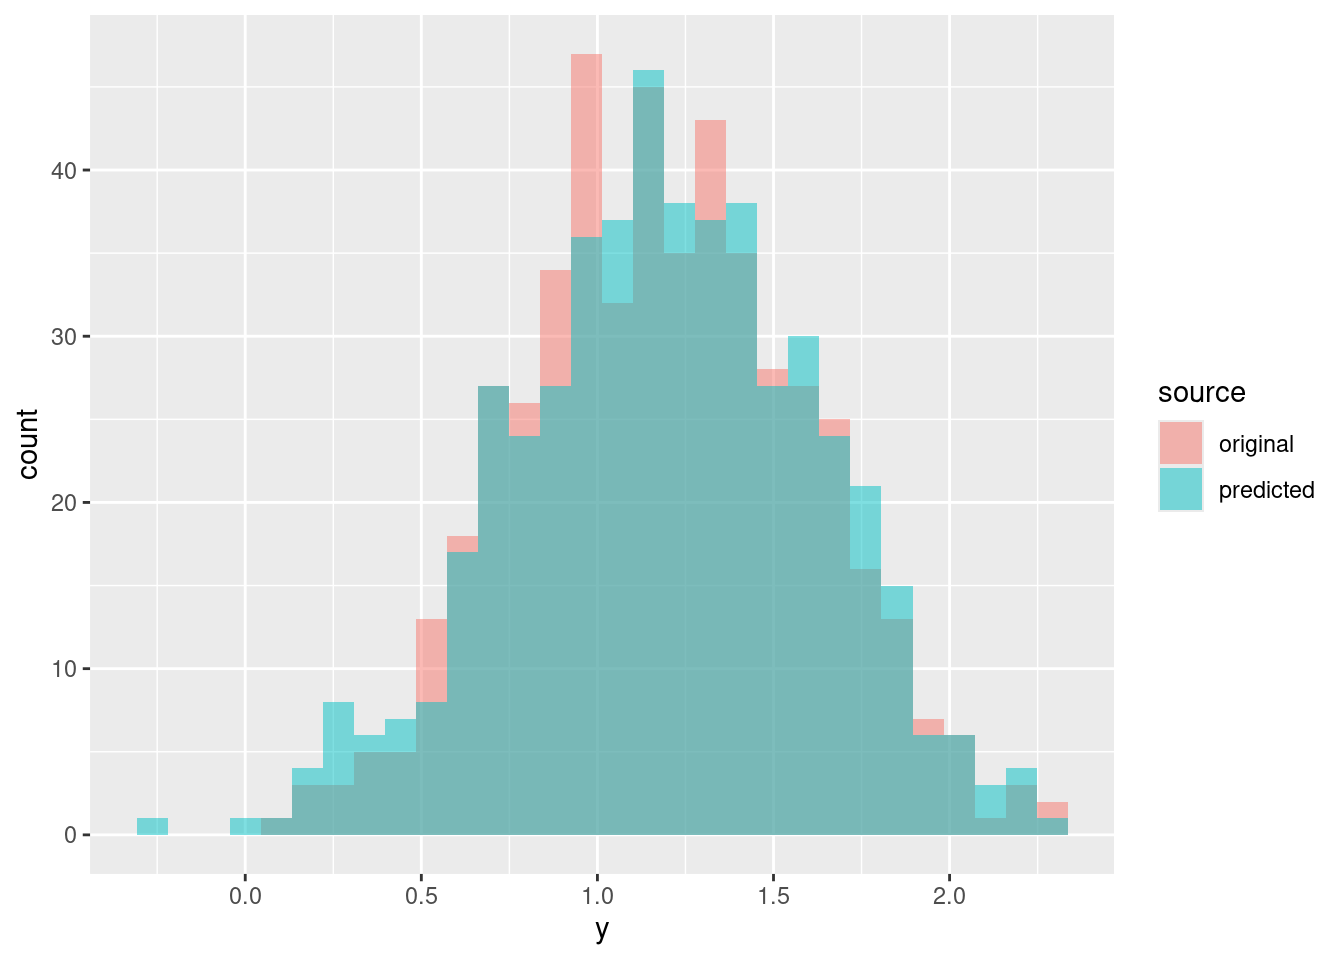

In [ ]:
s <- 1
S[s, ]

Now let’s repeat the same for 9 different posterior samples:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

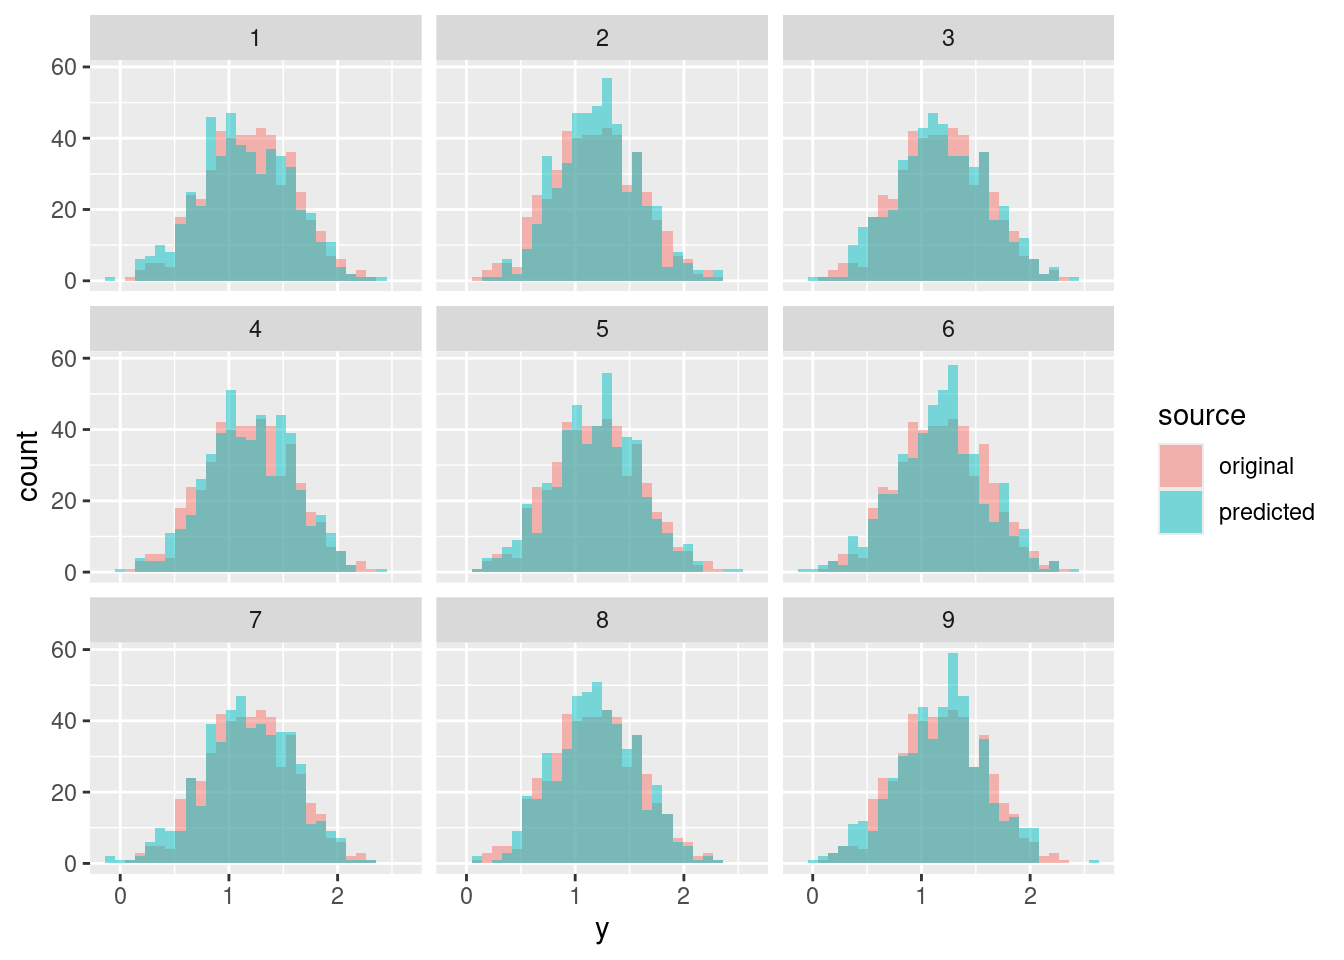

In [ ]:
pp <- NULL
for (s in 1:9) {
  mu_s <- S[s, '(Intercept)'] + S[s, 'x_1'] * df$x_1 + S[s, 'x_2'] * df$x_2
  y_s <- rnorm(n = nrow(df), mean = mu_s, sd = S[s, 'sigma'])
  pp <- rbind(pp, 
              data.frame(y = df$y, source = "original", s = s), 
              data.frame(y = y_s, source = "predicted", s = s))
}
ggplot(data = pp, aes(x = y, fill = source)) + 
  geom_histogram(alpha = .5, position = "identity") + 
  facet_wrap(~ s)

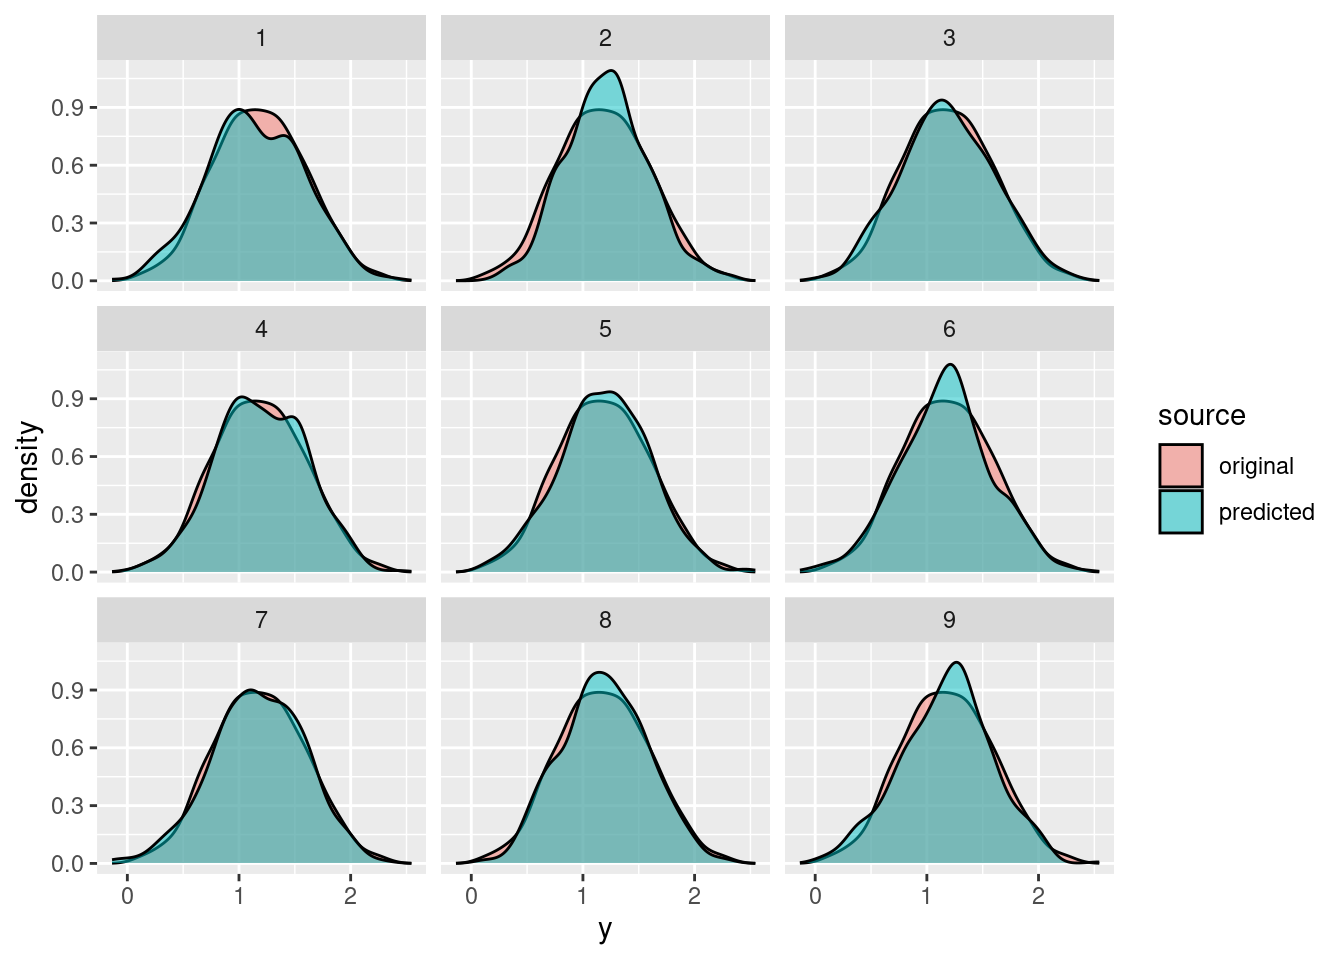

In [ ]:
ggplot(data = pp, aes(x = y, fill = source)) + 
  geom_density(alpha = .5, position = "identity") + 
  facet_wrap(~ s)

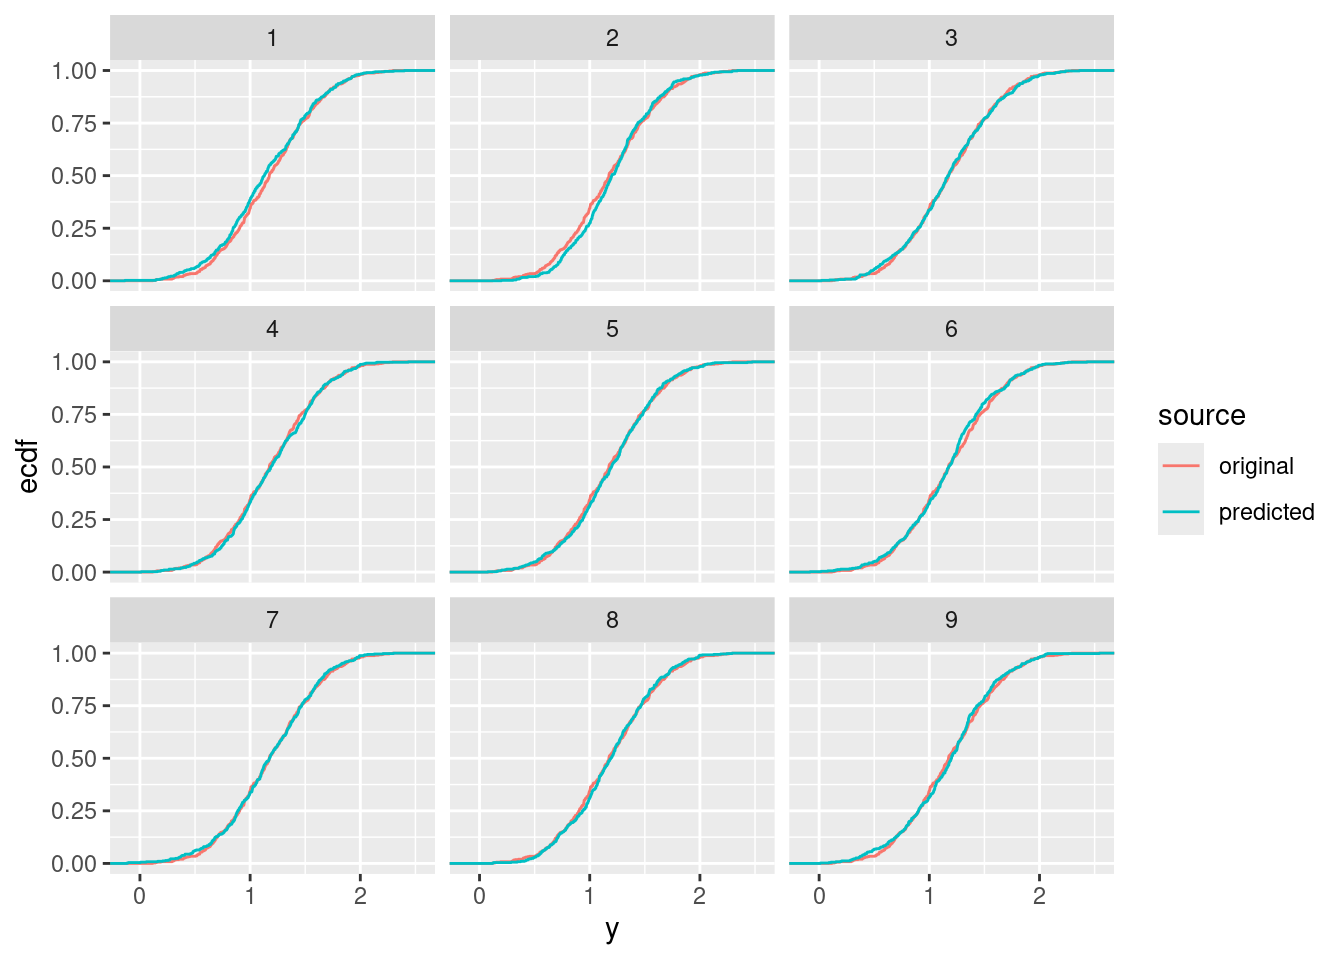

In [ ]:
ggplot(data = pp, aes(x = y, colour = source)) + 
  stat_ecdf() + 
  facet_wrap(~ s)

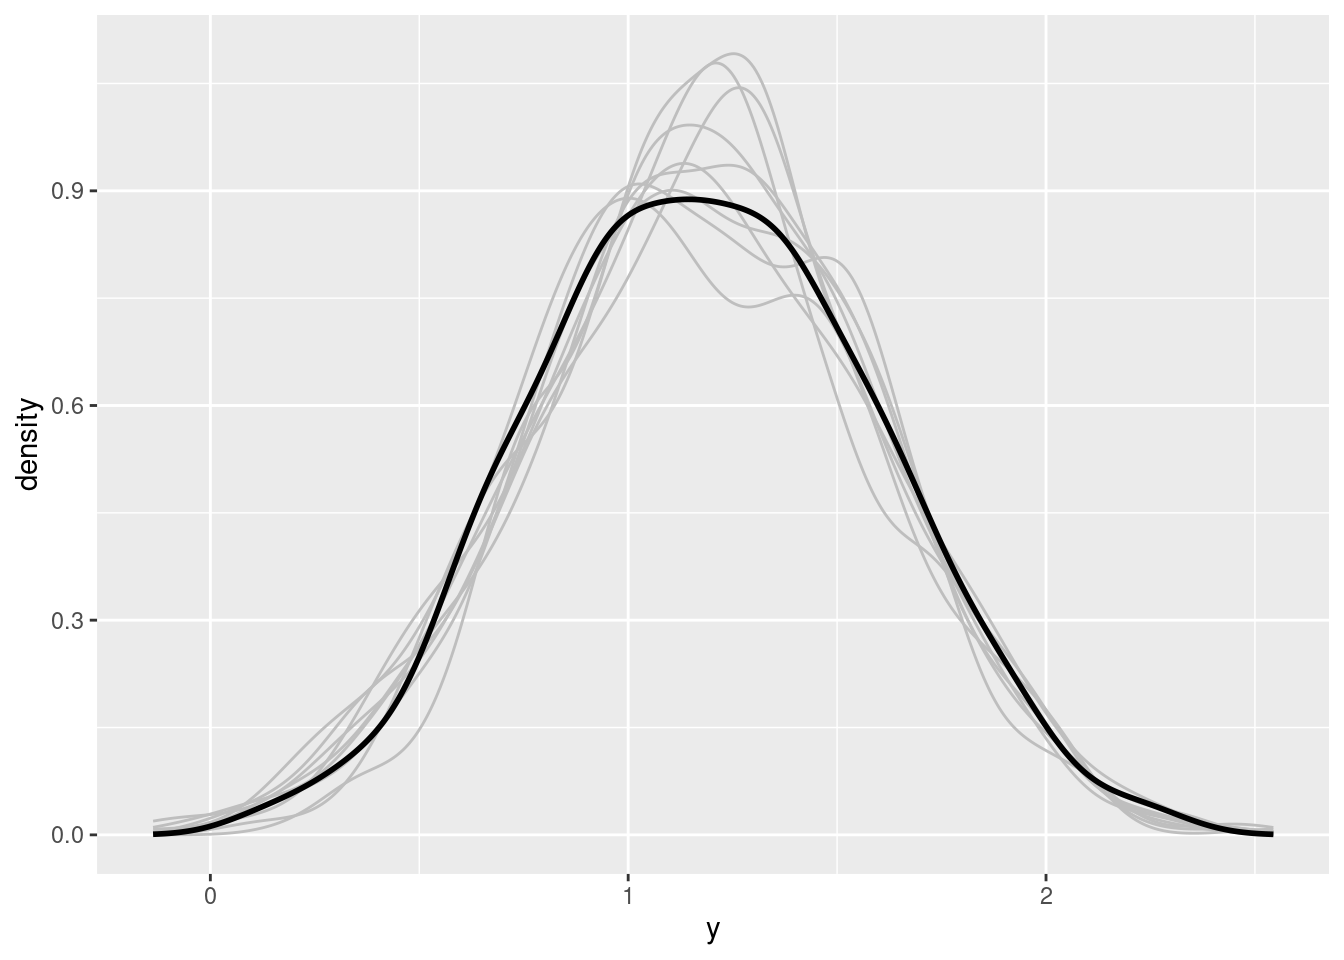

In [ ]:
ggplot(data = subset(pp, source == "predicted"),
       aes(x = y, group = s)) + 
  geom_density(position = "identity", fill = NA, colour = "grey") +
  geom_density(data = subset(pp, source == "original" & s == 1), 
               aes(x = y), linewidth = 1)

# Binary Regression Model

In [ ]:
rm(list = ls())
library("ggplot2")
library("plyr")

## Data Simulation

Data are simulated similarly as for the linear model:

In [ ]:
set.seed(123)
N <- 500
df <- data.frame(x_1 = runif(n = N), 
                 x_2 = runif(n = N))
(beta_0 <- rnorm(n = 1, mean = 0, sd = .1))

[1] -0.06018928

[1] 0.9006301

[1] -0.3973215

### Visualisations

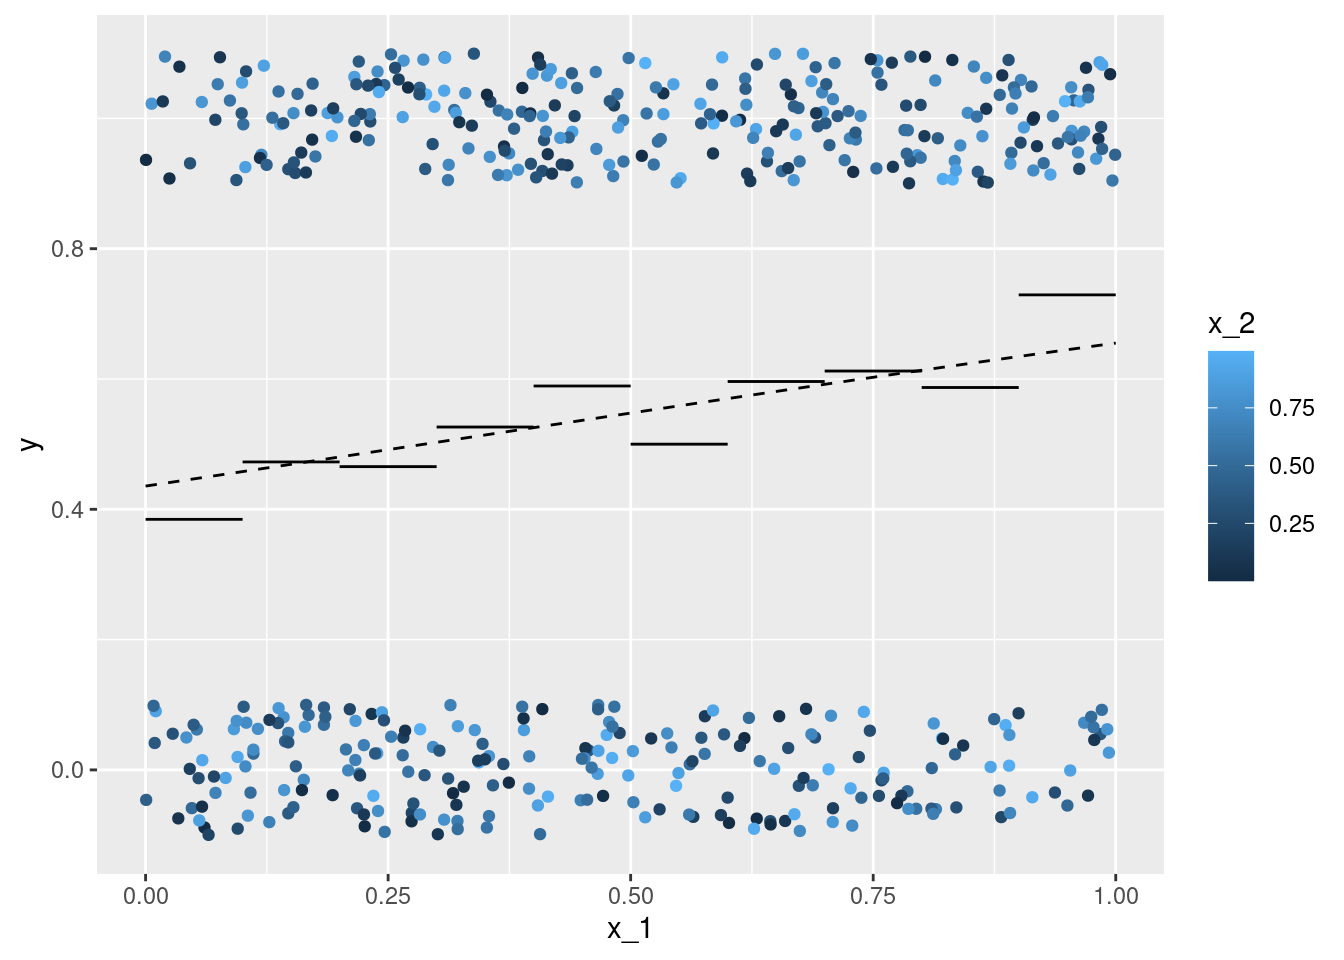

In [ ]:
df$x_1_c <- cut(df$x_1, breaks = seq(0, 1, by = .1), 
                include.lowest = T, 
                labels = seq(.05, .95, by = .1))
df$x_1_c <- as.numeric(as.character(df$x_1_c))
df_p_A <- ddply(df, c("x_1_c"), summarise, 
                p = mean(y > .5))
df_p_A <- data.frame('p' = rep(df_p_A$p, each = 2), 
                     'x_1' = sort(c(df_p_A$x_1_c - .05, 
                                    df_p_A$x_1_c + .05)))
df_p_B <- data.frame('x_1' = seq(0, 1, by = .01), 
                     'p' = plogis(beta_0 + 
                                    beta_x_1 * seq(0, 1, by = .01) + 
                                    beta_x_2 * .5))
set.seed(0)
ggplot(data = df, aes(x = x_1, y = y)) + 
  geom_jitter(aes(color = x_2), width = 0, height = .1) +
  geom_line(data = df_p_A, aes(y = p, group = p)) +
  geom_line(data = df_p_B, aes(y = p), linetype = 2)
## ... 'not as linear as it seems':
# plot(df_p_B$x_1[-1], diff(df_p_B$p))

## Modeling

The basic R command for (frequentist) estimation of the parameters of a binary regression model is a call to the function `glm` with `family` argument `binomial`:

In [ ]:
m <- glm(y ~ x_1 + x_2, data = df, 
         family = binomial(link = 'logit'))
summary(m)


Call:
glm(formula = y ~ x_1 + x_2, family = binomial(link = "logit"), 
    data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.2908     0.2358  -1.233 0.217531    
x_1           1.1598     0.3248   3.570 0.000356 ***
x_2          -0.1713     0.3138  -0.546 0.585034    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 688.53  on 499  degrees of freedom
Residual deviance: 675.30  on 497  degrees of freedom
AIC: 681.3

Number of Fisher Scoring iterations: 4

### Visualisations

         1          2 
-0.3764387  0.7833343 

[1] -0.3764387  0.7833343

        1         2 
0.2891090 0.1177866 

[1] 0.2891090 0.1177866

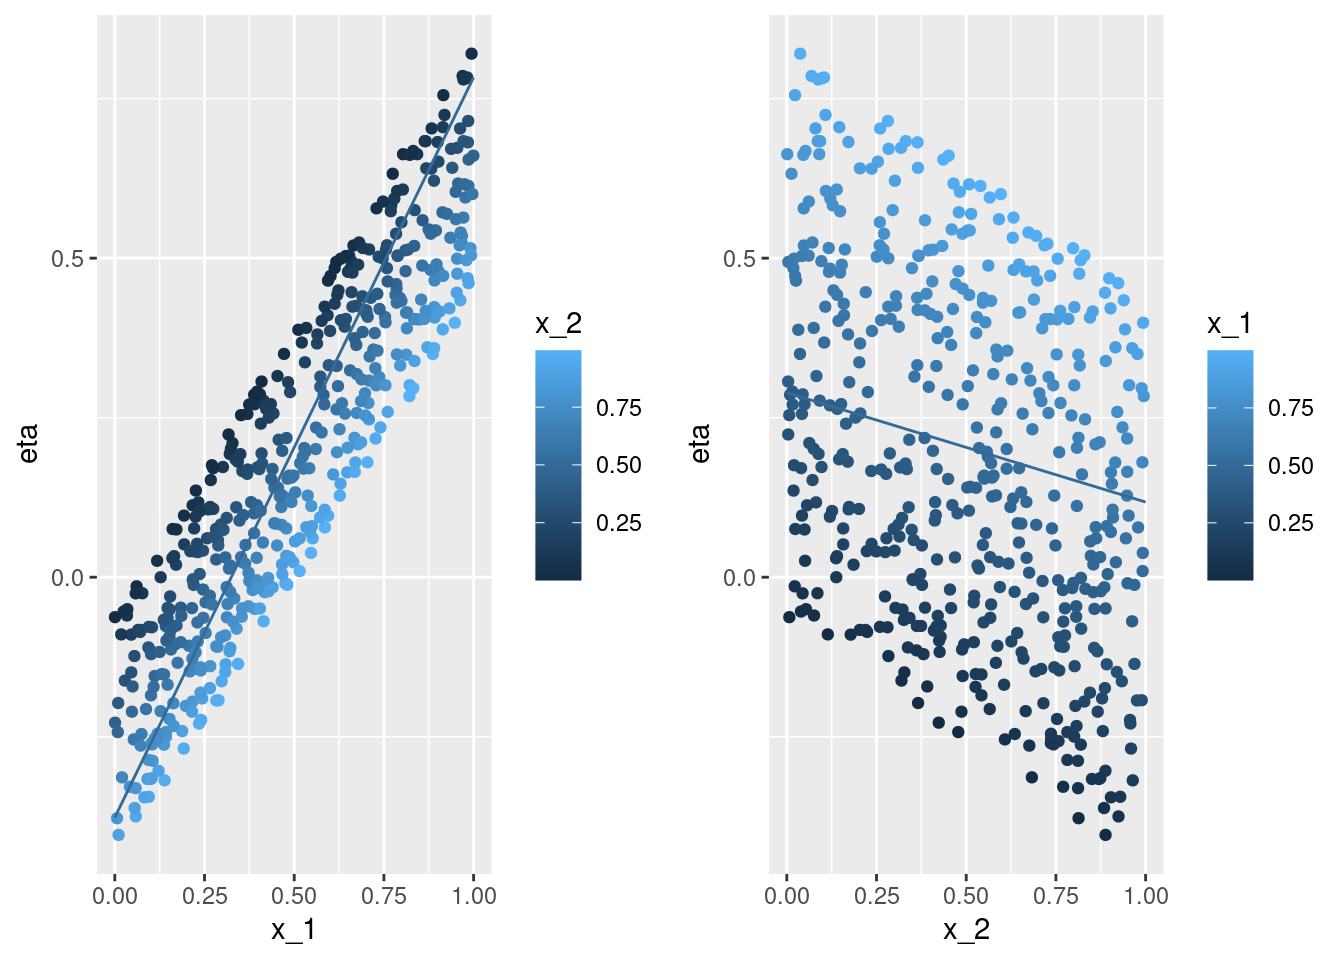

In [ ]:
nd <- data.frame('x_1' = 0:1, 'x_2' = .5)
(nd$eta <- predict(m, newdata = nd, type = 'link'))

 [1] 0.4069861 0.4352503 0.4639417 0.4928738 0.5218537 0.5506872 0.5791841
 [8] 0.6071630 0.6344556 0.6609111 0.6863983

 [1] 0.4069861 0.4352503 0.4639417 0.4928738 0.5218537 0.5506872 0.5791841
 [8] 0.6071630 0.6344556 0.6609111 0.6863983

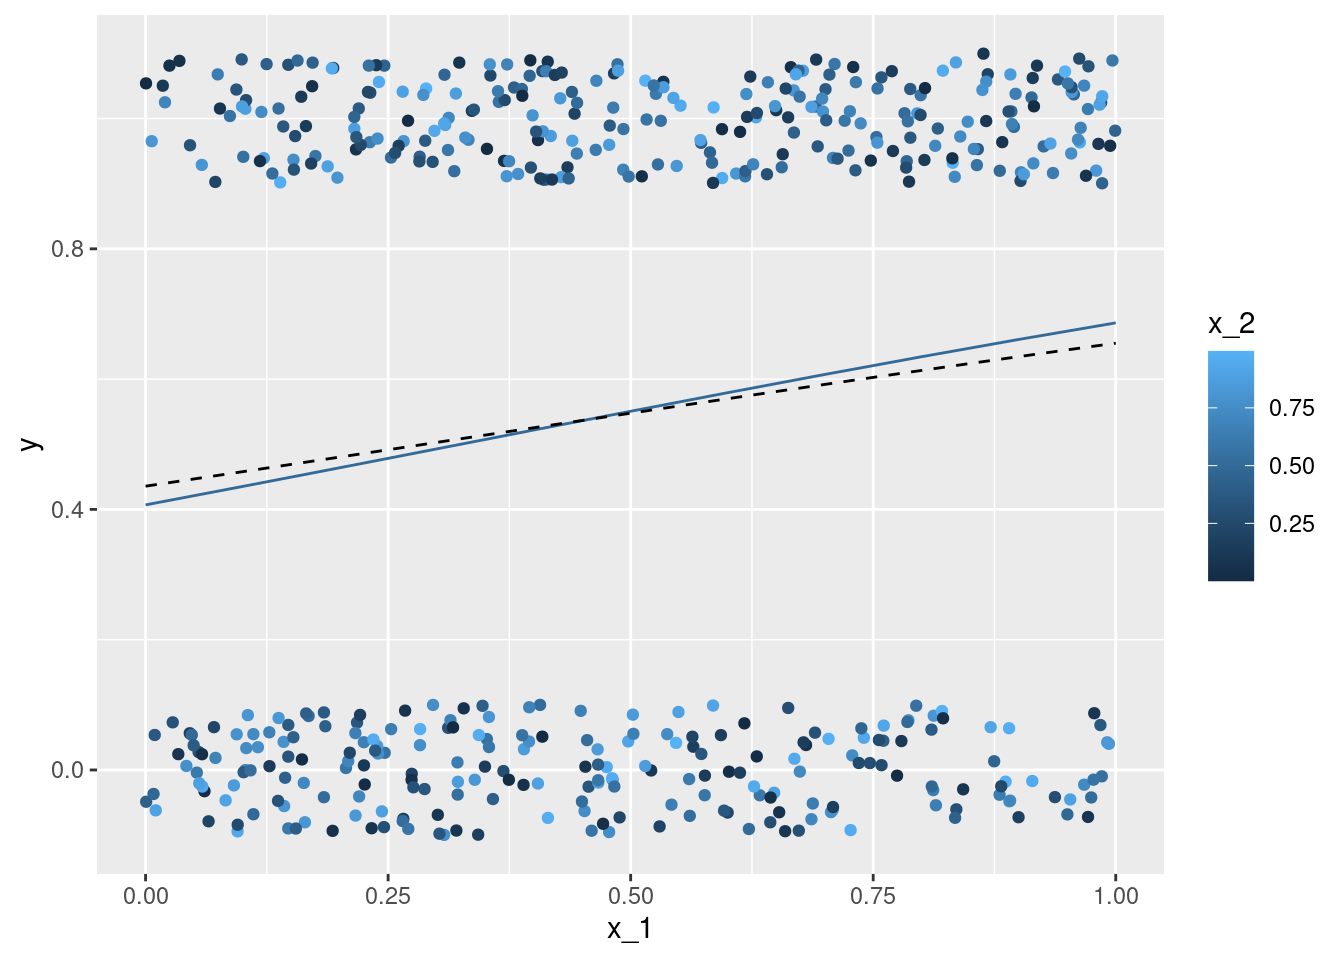

In [ ]:
nd <- data.frame(x_1 = seq(0, 1, by = .1), 
                 x_2 = .5)
(nd$p <- predict(m, newdata = nd, type = 'response'))

### Estimated Expected Value

We can apply the [Bernstein-von Mises theorem](https://en.wikipedia.org/wiki/Bernstein%E2%80%93von_Mises_theorem) to estimate the *expected value*:

-   **Fit the model**: Obtain the maximum likelihood estimate for the model’s coefficients (`coef`) along with their variance-covariance matrix (`vcov`).
-   **Simulate coefficients**: Perform an ‘informal’ Bayesian posterior simulation using the multivariate normal distribution, based on the *Bernstein-von Mises theorem*.
-   **Convert simulated coefficients**: Apply an appropriate transformation to the simulated coefficients to compute the *simulated quantity of interest*. This quantity typically depends on the values of all explanatory variables, and researchers may:
-   Focus on a specific observation (usually an ‘average’), or
-   Average across all sample observations.

In both cases, the applied transformation incorporates the researcher’s specific choice.

(Intercept)         x_1         x_2 
 -0.2907775   1.1597730  -0.1713224 

            (Intercept)          x_1          x_2
(Intercept)  0.05560471 -0.048970067 -0.047028038
x_1         -0.04897007  0.105509175 -0.004560743
x_2         -0.04702804 -0.004560743  0.098439583

     (Intercept)       x_1        x_2
[1,] -0.08125910 0.6544775 -0.2581602
[2,] -0.40299145 1.3779659 -0.3263178
[3,]  0.09915843 1.0089580 -0.5398310
[4,]  0.03289839 0.8600445 -0.3880109
[5,] -0.12814786 1.3256621 -0.5036957
[6,] -0.55953065 1.4562644  0.3176658

  x_1 x_2 s
1 0.0 0.5 1
2 0.1 0.5 1
3 0.2 0.5 1
4 0.3 0.5 1
5 0.4 0.5 1
6 0.5 0.5 1

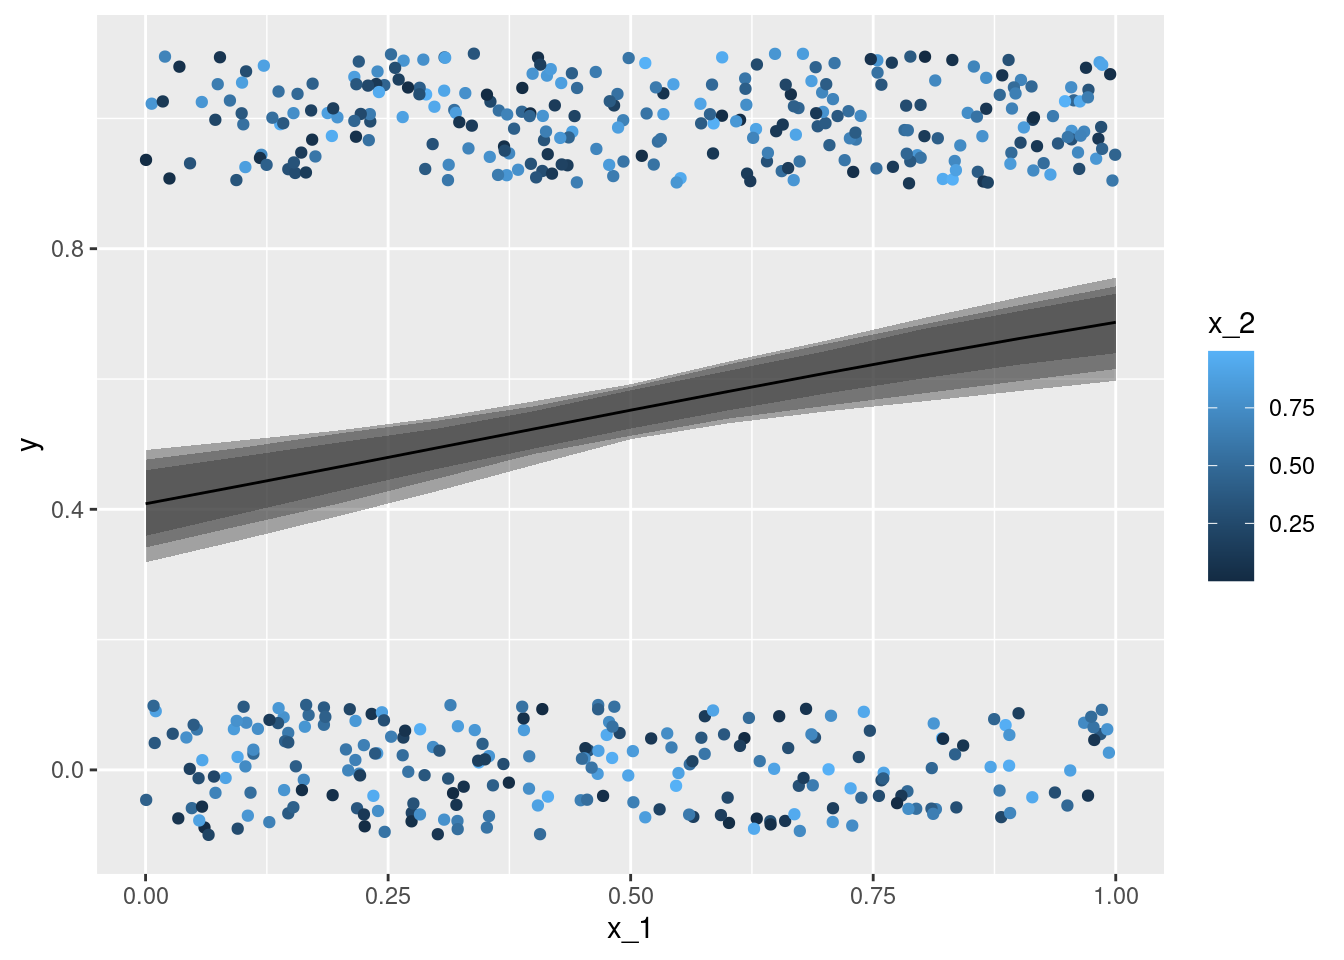

In [ ]:
library("MASS")
coef(m)

# Poisson Regression Model

In [ ]:
rm(list = ls())
library("ggplot2")

## Data Simulation

Data are simulated similarly as for the linear model:

In [ ]:
set.seed(123)
N <- 500
df <- data.frame(x_1 = runif(n = N), 
                 x_2 = runif(n = N))
(beta_0 <- rnorm(n = 1, mean = 0, sd = .1))

[1] -0.06018928

[1] 0.9006301

[1] -0.3973215

### Visualisations

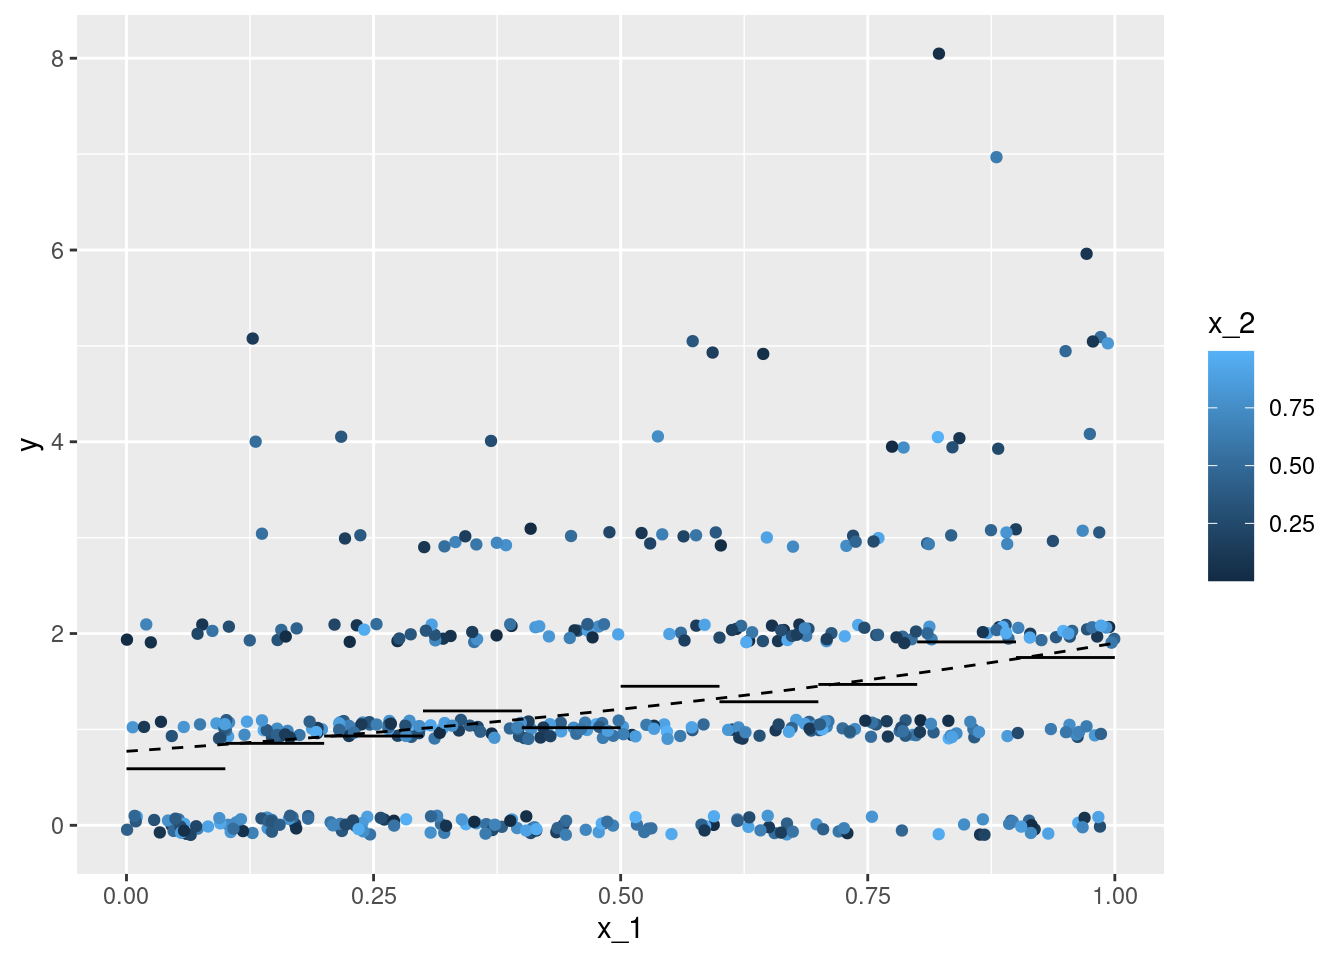

In [ ]:
df$x_1_c <- cut(df$x_1, breaks = seq(0, 1, by = .1), 
                include.lowest = T, 
                labels = seq(.05, .95, by = .1))
df$x_1_c <- as.numeric(as.character(df$x_1_c))
df_p_A <- ddply(df, c("x_1_c"), summarise, 
                mu = mean(y))
df_p_A <- data.frame('mu' = rep(df_p_A$mu, each = 2), 
                     'x_1' = sort(c(df_p_A$x_1_c - .05, 
                                    df_p_A$x_1_c + .05)))
df_p_B <- data.frame('x_1' = seq(0, 1, by = .01), 
                     'mu' = exp(beta_0 + 
                                  beta_x_1 * seq(0, 1, by = .01) + 
                                  beta_x_2 * .5))
set.seed(0)
ggplot(data = df, aes(x = x_1, y = y)) + 
  geom_jitter(aes(color = x_2), width = 0, height = .1) +
  geom_line(data = df_p_A, aes(y = mu, group = mu)) +
  geom_line(data = df_p_B, aes(y = mu), linetype = 2)

## Modeling

The basic R command for (frequentist) estimation of the parameters of a binary regression model is a call to the function `glm` with `family` argument `poisson(link = 'log')`:

In [ ]:
m <- glm(y ~ x_1 + x_2, data = df, family = poisson(link = 'log'))
summary(m)


Call:
glm(formula = y ~ x_1 + x_2, family = poisson(link = "log"), 
    data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.09637    0.11000  -0.876    0.381    
x_1          1.05534    0.14351   7.354 1.93e-13 ***
x_2         -0.54067    0.13875  -3.897 9.74e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 619.76  on 499  degrees of freedom
Residual deviance: 551.67  on 497  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 5

### Estimated Expected Value

Let’s again apply the [Bernstein-von Mises theorem](:https://en.wikipedia.org/wiki/Bernstein%E2%80%93von_Mises_theorem)

(Intercept)         x_1         x_2 
-0.09636825  1.05534471 -0.54067416 

             (Intercept)           x_1           x_2
(Intercept)  0.012100215 -0.0115419704 -0.0083283575
x_1         -0.011541970  0.0205956476 -0.0008112633
x_2         -0.008328358 -0.0008112633  0.0192505213

     (Intercept)       x_1        x_2
[1,]  0.05743986 0.8596548 -0.5240625
[2,] -0.10120645 1.1692825 -0.5989887
[3,]  0.01910641 0.9263818 -0.7232511
[4,]  0.02386701 0.8912981 -0.6321912
[5,] -0.06117581 1.0833727 -0.7137618
[6,] -0.30539283 1.1687677 -0.3825595

  x_1 x_2 s
1 0.0 0.5 1
2 0.1 0.5 1
3 0.2 0.5 1
4 0.3 0.5 1
5 0.4 0.5 1
6 0.5 0.5 1

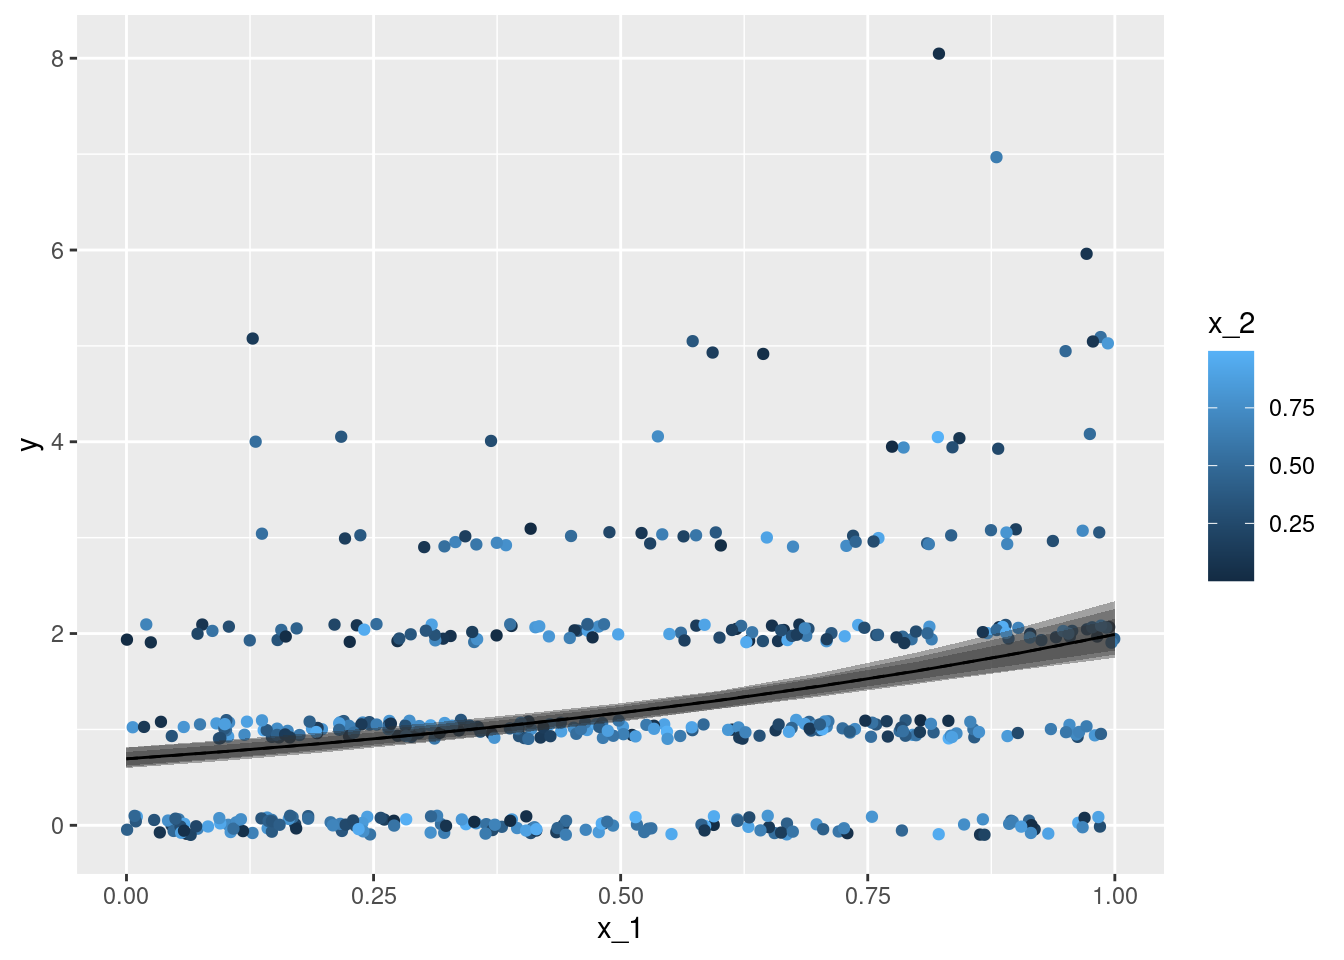

In [ ]:
library("MASS")
coef(m)

# Mixed models

… a.k.a. *hierarchical model*, *multilevel model*, …

In [ ]:
rm(list = ls())
library("lme4")
library("ggplot2")
library("plyr")

## Data Simulation Function `f_sim_data`

In [ ]:
f_sim_data <- function(seed, type) {
  set.seed(seed) # Set seed for reproducibility
  parameters <- list(## Global intercept: 
    "beta_0" = rnorm(n = 1, mean = 2, sd = .1),
    ## Global slope of 'x':
    "beta_x" = rnorm(n = 1, mean = 1.5, sd = .1),
    ## Standard deviation of residuals:
    "sigma" = abs(rnorm(n = 1, mean = 1, 
                        sd = .1)))
  if (type == "Random_Intercept") {
    ## Standard deviation of random intercept parameters:
    parameters$'sigma_u' <- abs(rnorm(n = 1, mean = 1, sd = .1))
    ## Number of groups: 
    parameters$'G' <- 30
    ## Number of observations per group:
    parameters$'n_per_g' <- 30
    g <- rep(1:parameters$'G', each = parameters$'n_per_g')
    x <- runif(n = parameters$'G' * parameters$'n_per_g', 
               min = -1, max = 1)
    df <- data.frame('x' = x, 
                     'g' = g)
    df$u <- rnorm(n = parameters$'G', mean = 0, 
                  sd = parameters$'sigma_u')[df$g]
    df$mu <- parameters$'beta_0' + 
      parameters$'beta_x' * df$x + df$u
    attributes(df)$'type' <- type 
    attributes(df)$'parameters' <- parameters
  }
  if (type == "Nested") {
    ## Standard deviation of random intercept parameters:
    parameters$'sigma_u_a' <- abs(rnorm(n = 1, mean = 1, sd = .1))
    parameters$'sigma_u_b' <- abs(rnorm(n = 1, mean = 1, sd = .1))
    ## Number of groups in 1st level:
    parameters$'G_a' <- 30
    ## Number of observations per group:
    parameters$'n_per_g_a' <- 30
    ## Number of groups in 2nd level:
    parameters$'G_b' <- 10
    ## Number of observations per group:
    parameters$'n_per_g_b' <- 6
    gr <- as.data.frame(expand.grid('g_a' = 1:parameters$'G_a', 
                                    'g_b' = 1:parameters$'G_b'))
    df <- gr[rep(1:nrow(gr), each = parameters$'n_per_g_b'), ]
    df <- df[order(df$g_a, df$g_b), ]
    rownames(df) <- NULL
    df$g_ab <- paste0(df$g_a, "_", df$g_b)
    df$x <- runif(n = parameters$'G_a' * parameters$'n_per_g_a', 
                  min = -1, max = 1)
    u_a <- rnorm(n = parameters$'G_a', mean = 0, 
                 sd = parameters$'sigma_u_a')
    df$u_a <- u_a[df$g_a]
    u_b <- rnorm(n = length(unique(df$g_ab)), mean = 0, 
                 sd = parameters$'sigma_u_b')
    names(u_b) <- unique(df$g_ab)
    df$u_b <- as.numeric(u_b[df$g_ab])
    df$mu <- parameters$'beta_0' + parameters$'beta_x' * df$x + 
      df$u_a + df$u_b
    attributes(df)$'type' <- type 
    attributes(df)$'parameters' <- parameters
  }
  epsilon <- rnorm(n = nrow(df), mean = 0, sd = parameters$'sigma')
  df$y <- df$mu + epsilon
  return(df)
}

## Random Intercept Model

In [ ]:
df <- f_sim_data(seed = 0, type = "Random_Intercept")
head(df)

           x g         u          mu          y
1  0.3215956 1 -1.095936  1.50226149  2.9095988
2  0.2582281 1 -1.095936  1.40927751  2.1118975
3 -0.8764275 1 -1.095936 -0.25568956 -0.1425014
4 -0.5880509 1 -1.095936  0.16746754  2.2155593
5 -0.6468865 1 -1.095936  0.08113349 -1.6210895
6  0.3740457 1 -1.095936  1.57922556  1.9028505

   beta_0    beta_x     sigma   sigma_u         G   n_per_g 
 2.126295  1.467377  1.132980  1.127243 30.000000 30.000000 

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ x + (1 | g)
   Data: df

REML criterion at convergence: 2889.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.10483 -0.67888 -0.01549  0.67941  2.97945 

Random effects:
 Groups   Name        Variance Std.Dev.
 g        (Intercept) 1.421    1.192   
 Residual             1.287    1.134   
Number of obs: 900, groups:  g, 30

Fixed effects:
            Estimate Std. Error t value
(Intercept)  2.00545    0.22090   9.078
x            1.51171    0.06674  22.652

Correlation of Fixed Effects:
  (Intr)
x 0.000 

### … small simulation study

In [ ]:
R <- 50
ci_df <- NULL
for (r in 1:R) {
  ## Simulate data:
  df <- f_sim_data(seed = r, type = "Random_Intercept")
  ## Estimate models:
  lm_model <- lm(y ~ x, data = df)
  lmer_model <- lmer(y ~ x + (1 | g), data = df)
  ## Extract confidence intervals:
  lm_ci <- confint(lm_model, level = 0.95)
  lmer_ci <- suppressMessages(confint(lmer_model, level = 0.95))
  ## Store results:
  par_name <- "sigma"
  tmp <- data.frame(r = r,
                    par_name = par_name,
                    Value = rep(attributes(df)$parameters$sigma, 
                                times = 2),
                    Model = c("lm", "lmer"),
                    Estimate = c(summary(lm_model)$sigma, 
                                 summary(lmer_model)$sigma),
                    CI_Low = rep(NA, 2),
                    CI_High = c(NA, 2))
  ci_df <- rbind(ci_df, tmp)
  par_name <- "x"
  tmp <- data.frame(r = r,
                    par_name = par_name,
                    Value = rep(attributes(df)$parameters$beta_x, 
                                times = 2),
                    Model = c("lm", "lmer"),
                    Estimate = c(coef(lm_model)[par_name], 
                                 fixef(lmer_model)[par_name]),
                    CI_Low = c(lm_ci[par_name, 1], 
                               lmer_ci[par_name, 1]),
                    CI_High = c(lm_ci[par_name, 2], 
                                lmer_ci[par_name, 2]))
  ci_df <- rbind(ci_df, tmp)
  par_name <- "(Intercept)"
  tmp <- data.frame(r = r,
                    par_name = par_name,
                    Value = rep(attributes(df)$parameters$beta_0, 
                                times = 2),
                    Model = c("lm", "lmer"),
                    Estimate = c(coef(lm_model)[par_name], 
                                 fixef(lmer_model)[par_name]),
                    CI_Low = c(lm_ci[par_name, 1], 
                               lmer_ci[par_name, 1]),
                    CI_High = c(lm_ci[par_name, 2], 
                                lmer_ci[par_name, 2]))
  ci_df <- rbind(ci_df, tmp)
  cat(".")
}
ci_df$par_name <- factor(ci_df$par_name, 
                         levels = c("(Intercept)", "x", "sigma"))

In [ ]:
# save(ci_df, file = "mixed_models_ci_df.RData")
load(file = "mixed_models_ci_df.RData")

(`geom_segment()`).
Removed 50 rows containing missing values or values outside the scale range
(`geom_segment()`).

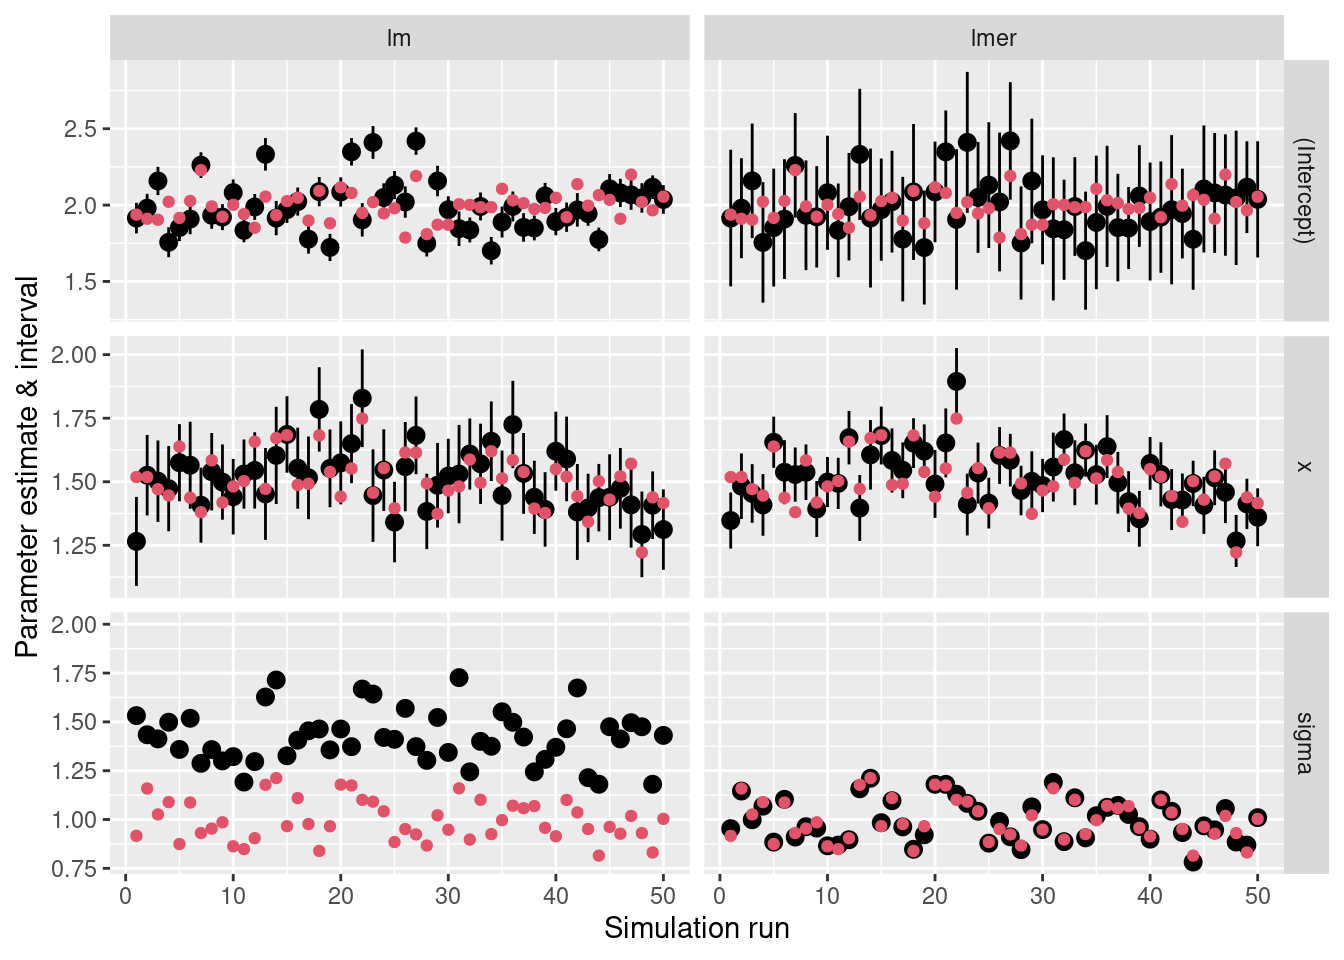

In [ ]:
ggplot(ci_df, aes(x = r)) +
  geom_pointrange(aes(y = Estimate, ymin = CI_Low, 
                      ymax = CI_High)) +
  geom_point(aes(y = Value), color = 2) +
  labs(y = "Parameter estimate & interval",
       x = "Simulation run") +
  facet_grid(cols = vars(Model), rows = vars(par_name), 
             scales = "free") +
  theme(legend.position = "none")

## Random Intercept with Random Slope Model

           x g         u          mu          y   u_slope
1  0.3215956 1 -1.095936  1.50226149  2.4603313 -1.396995
2  0.2582281 1 -1.095936  1.40927751  1.7511541 -1.396995
3 -0.8764275 1 -1.095936 -0.25568956  1.0818636 -1.396995
4 -0.5880509 1 -1.095936  0.16746754  3.0370635 -1.396995
5 -0.6468865 1 -1.095936  0.08113349 -0.7173922 -1.396995
6  0.3740457 1 -1.095936  1.57922556  1.3803104 -1.396995

     beta_0      beta_x       sigma     sigma_u           G     n_per_g 
   2.126295    1.467377    1.132980    1.127243   30.000000   30.000000 
sigma_u_x_g 
   1.066731 

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ x + (1 + x | g)
   Data: df

REML criterion at convergence: 2969.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.73036 -0.66985 -0.01614  0.65063  2.87938 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 g        (Intercept) 1.410    1.187        
          x           1.488    1.220    0.03
 Residual             1.299    1.140        
Number of obs: 900, groups:  g, 30

Fixed effects:
            Estimate Std. Error t value
(Intercept)   2.0000     0.2202   9.084
x             1.3435     0.2328   5.772

Correlation of Fixed Effects:
  (Intr)
x 0.024 

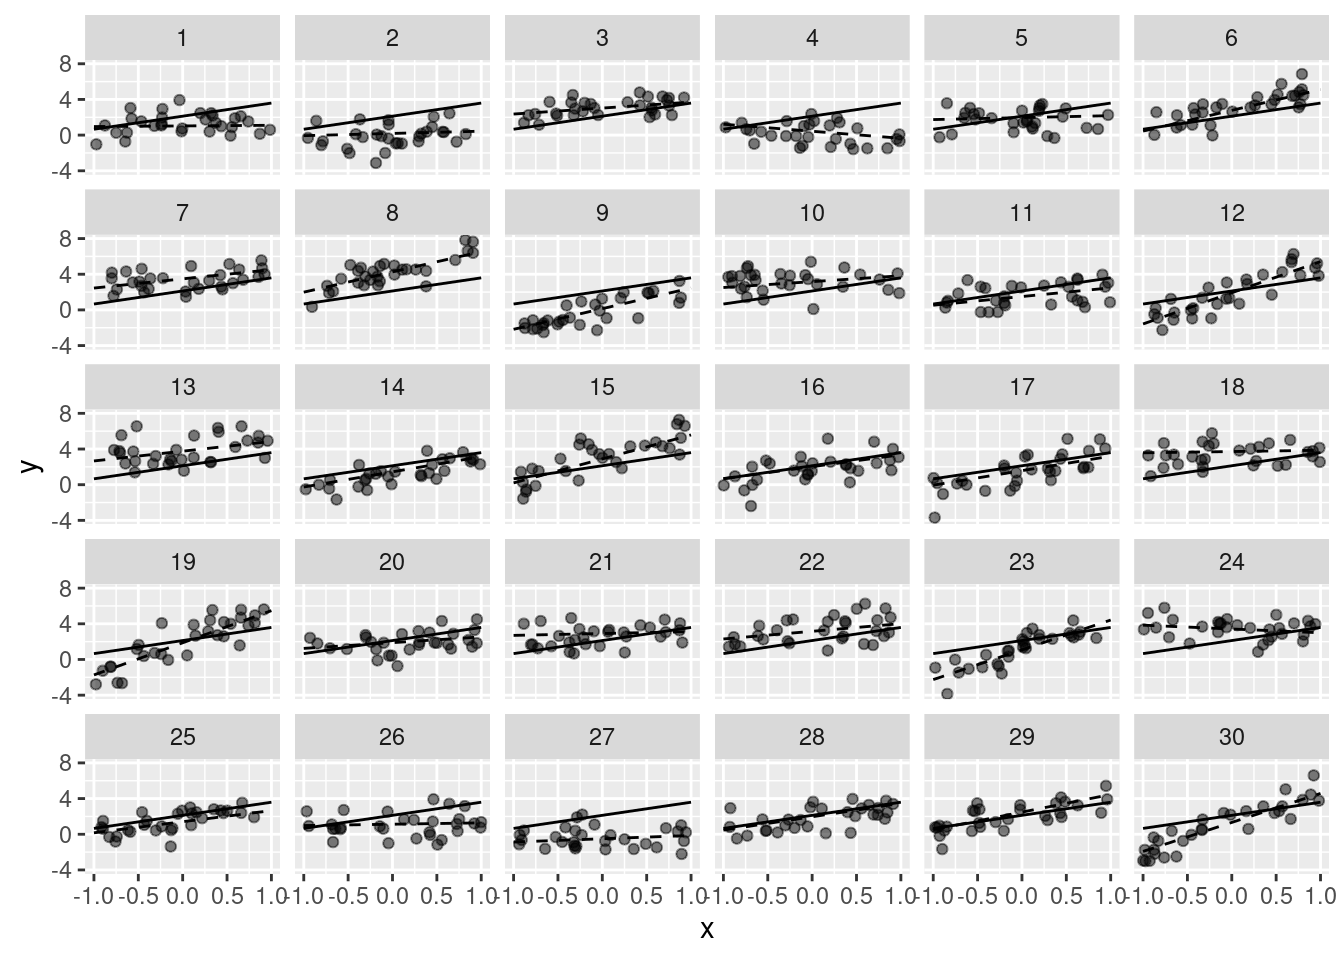

In [ ]:
f_add_random_slope <- function(df, x_lab, g_lab) {
  ## assign(paste0("sigma_u_", x_label, "_", g_label), 1)
  sigma_u_slope <- abs(rnorm(n = 1, mean = 1, sd = .1))
  u_slope <- rnorm(length(unique(df[, g_lab])), mean = 0, 
                   sd = sigma_u_slope)
  df$u_slope <- u_slope[df[, g_lab]]
  df$y <- df$y + df[, x_lab] * df$u_slope
  attributes(df)$parameters[[paste0("sigma_u_", x_lab, "_", g_lab)]] <- 
    sigma_u_slope
  return(df)
}
df <- f_sim_data(seed = 0, type = "Random_Intercept")
df <- f_add_random_slope(df = df, x_lab = "x", g_lab = "g")
head(df)

## Nested Model

  g_a g_b g_ab          x       u_a       u_b          mu          y
1   1   1  1_1 -0.8764275 -1.936757 0.6458663 -0.45064437 -0.8523900
2   1   1  1_1 -0.5880509 -1.936757 0.6458663 -0.02748727  0.1857836
3   1   1  1_1 -0.6468865 -1.936757 0.6458663 -0.11382132  0.9328256
4   1   1  1_1  0.3740457 -1.936757 0.6458663  1.38427075  3.8232376
5   1   1  1_1 -0.2317926 -1.936757 0.6458663  0.49527783 -0.7620346
6   1   1  1_1  0.5396828 -1.936757 0.6458663  1.62732283  2.7937350

   beta_0    beta_x     sigma sigma_u_a sigma_u_b       G_a n_per_g_a       G_b 
 2.126295  1.467377  1.132980  1.127243  1.041464 30.000000 30.000000 10.000000 
n_per_g_b 
 6.000000 

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ x + (1 | g_a/g_b)
   Data: df

REML criterion at convergence: 6235.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.06066 -0.65621  0.02234  0.63566  2.79567 

Random effects:
 Groups   Name        Variance Std.Dev.
 g_b:g_a  (Intercept) 0.8489   0.9214  
 g_a      (Intercept) 1.4214   1.1922  
 Residual             1.3809   1.1751  
Number of obs: 1800, groups:  g_b:g_a, 300; g_a, 30

Fixed effects:
            Estimate Std. Error t value
(Intercept)  2.10415    0.22578   9.319
x            1.41589    0.05253  26.954

Correlation of Fixed Effects:
  (Intr)
x 0.001 

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ x + (1 | g_a) + (1 | g_ab)
   Data: df

REML criterion at convergence: 6235.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.06066 -0.65621  0.02234  0.63566  2.79567 

Random effects:
 Groups   Name        Variance Std.Dev.
 g_ab     (Intercept) 0.8489   0.9214  
 g_a      (Intercept) 1.4214   1.1922  
 Residual             1.3809   1.1751  
Number of obs: 1800, groups:  g_ab, 300; g_a, 30

Fixed effects:
            Estimate Std. Error t value
(Intercept)  2.10415    0.22578   9.319
x            1.41589    0.05253  26.954

Correlation of Fixed Effects:
  (Intr)
x 0.001 

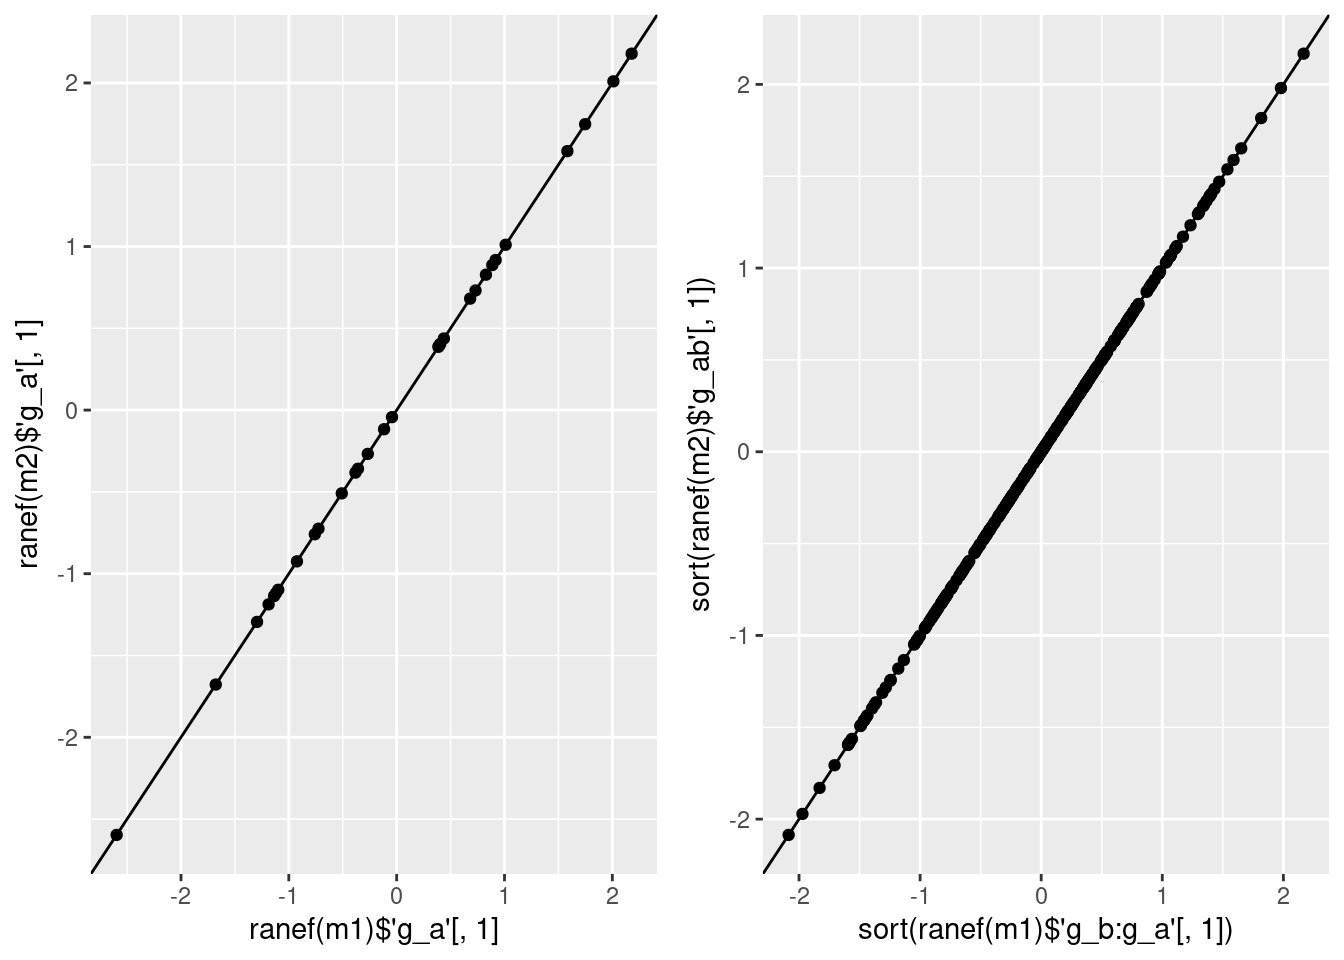

In [ ]:
df <- f_sim_data(seed = 0, type = "Nested")
head(df)

### … add covariate ‘z’ as constant within 2nd level

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ x + z + (1 | g_a/g_b)
   Data: df

REML criterion at convergence: 6236.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.05900 -0.66108  0.02254  0.63115  2.78727 

Random effects:
 Groups   Name        Variance Std.Dev.
 g_b:g_a  (Intercept) 0.848    0.9209  
 g_a      (Intercept) 1.429    1.1955  
 Residual             1.381    1.1751  
Number of obs: 1800, groups:  g_b:g_a, 300; g_a, 30

Fixed effects:
            Estimate Std. Error t value
(Intercept)  2.09644    0.22647   9.257
x            1.41538    0.05253  26.943
z            1.72034    0.11487  14.976

Correlation of Fixed Effects:
  (Intr) x     
x  0.001       
z -0.033 -0.009

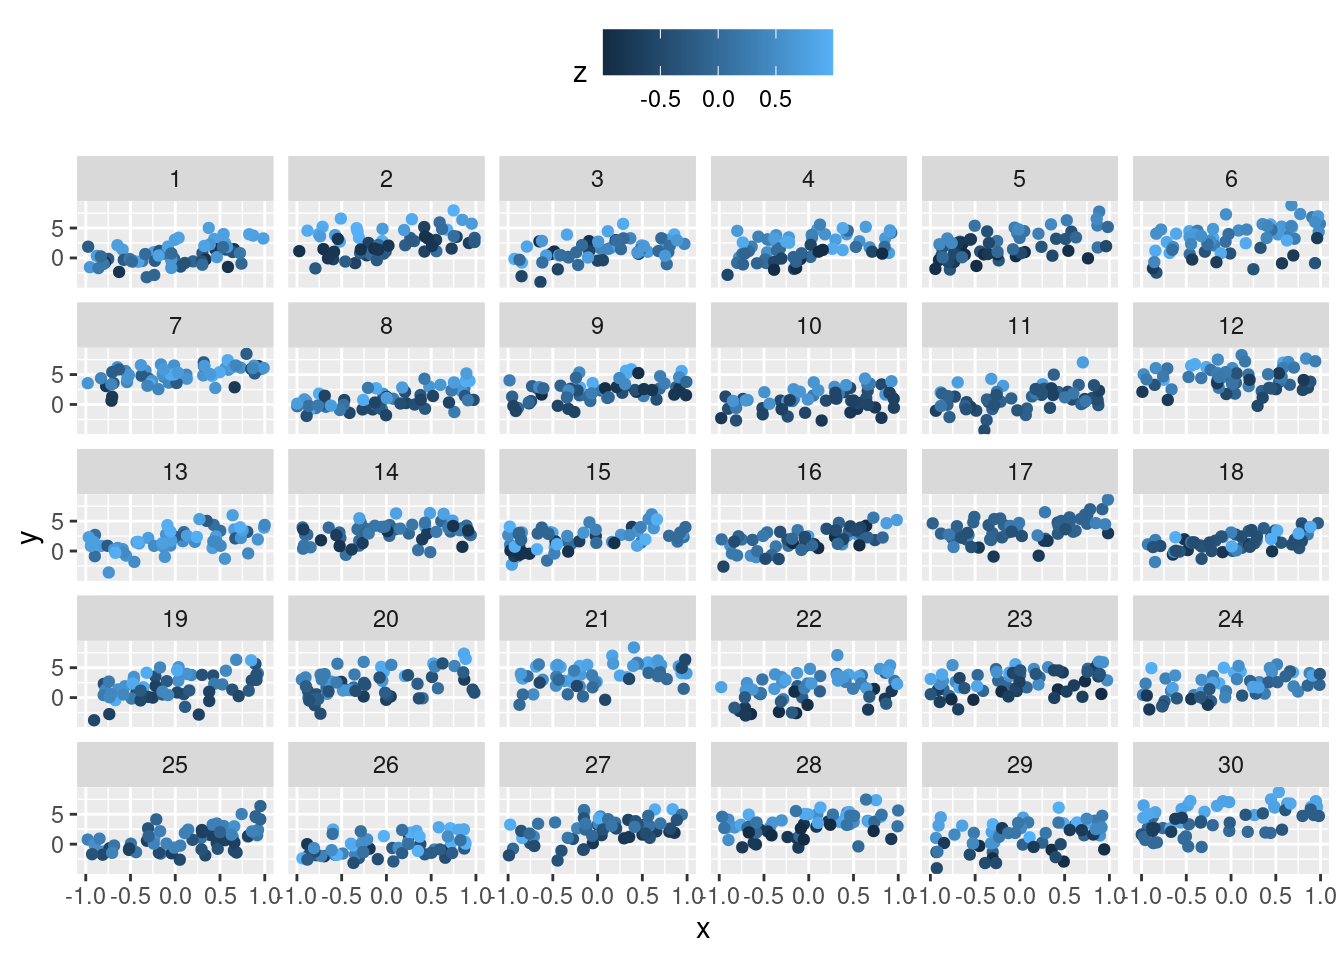

In [ ]:
f_add_covariate_constant_within_b <- function(df) {
  attributes(df)$'parameters'$'beta_z' <- rnorm(n = 1, mean = 1.5, 
                                                sd = .1)
  if (attributes(df)$type != "Nested") {
    stop("Use type 'Nested' to generate 'df'.")
  }
  z <- runif(n = length(unique(df$g_ab)), min = -1, max = 1)
  names(z) <- unique(df$g_ab)
  df$z <- as.numeric(z[df$g_ab])
  df$y <- df$y + df$z * attributes(df)$'parameters'$'beta_z'
  return(df)
}
df <- f_sim_data(seed = 0, type = "Nested")
df <- f_add_covariate_constant_within_b(df = df)
ggplot(data = df, aes(x = x, y = y, colour = z)) + 
  geom_point() + 
  facet_wrap(~ g_a) + 
  theme(legend.position = 'top')
m <- lmer(y ~ x + z + (1 | g_a / g_b), data = df)
summary(m)

# References